# King County House Sales Project
**Authors:** Elena Burlando

## Overview

The objective of this project is to analyze housing data for King County to provide insights on variables that effect sale price and also determine if there any pricing trends that can project future growth of certain markets. 

As an outcome of this analysis we are hoping to get: 

Insights for real estate agents: 
 * Price drivers (predictors)
 * Housing market trends based on zipcode


## Business Problem

A local real estate agency in King County WA is looking to develop a web tool that would help clients to estimate the sale prices for their homes. This tool will be used as a marketing tool to engage and acquire new customers. Ideally, we would like to include variables that sellers can control such as staging, curb appeal, remodeling, fixture updates, the color of walls, etc. This will provide visibility to sellers on what investments can contribute to the price increase of their house.

In addition, the agency is looking to develop an internal tool that would showcase current Housing Market trends. This tool will help their real estate agents to reach potential house sellers ahead of the competition and help their buying clients to get a better return on the investment.
***
One of the main business pain points is high competition from large established and small real estate agencies in the area. Proposed tools will differentiate the agency from the competition and lead to higher engagement and sales.
***


## 1. Data Understanding

For this project we will be using data from: 
* [King county house data](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)
* [Zipcode list](https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033)


Predictor variables: 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront', 'view', 'grade', 'condition', 'city' for house sales between 2014 and 2015 for King County WA.

***
* Using these sources we would be able to answer our questions listed above. 
* The target variable is sale price.  
* We intend to use Multiple Linear Regression to calculate formula to predict future house sale price. 
* We will be following CRISP-DM process for this project. 
***

In [1]:
#Libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower


from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error

import sys
import os
module_path = os.path.abspath(os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
from lin_reg import best_line

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21597, 21)

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Outliers

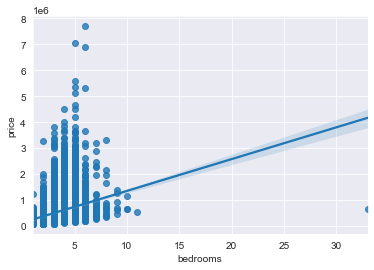

In [5]:
ax = sns.regplot(x='bedrooms', y='price', data=df)

In [6]:
df.loc[df.price > 2000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
153,7855801670,4/1/2015,2250000.0,4,3.25,5180,19850,2.0,NO,GOOD,...,12 Luxury,3540,1640.0,2006,0.0,98006,47.5620,-122.162,3160,9750
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,YES,EXCELLENT,...,9 Better,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841
269,7960900060,5/4/2015,2900000.0,4,3.25,5050,20100,1.5,NO,AVERAGE,...,11 Excellent,4750,300.0,1982,NaN,98004,47.6312,-122.223,3890,20060
282,7424700045,5/13/2015,2050000.0,5,3.00,3830,8480,2.0,NO,FAIR,...,9 Better,2630,1200.0,1905,1994.0,98122,47.6166,-122.287,3050,7556
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,YES,EXCELLENT,...,10 Very Good,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21294,2154970020,7/3/2014,2350000.0,4,4.25,5010,19412,2.0,NO,FAIR,...,11 Excellent,4000,1010.0,2014,0.0,98040,47.5455,-122.211,3820,17064
21352,9533100285,6/30/2014,2070000.0,4,3.75,4350,7965,2.0,NO,NONE,...,10 Very Good,4350,0.0,2013,0.0,98004,47.6289,-122.205,2190,8557
21490,2524069097,5/9/2014,2240000.0,5,6.50,7270,130017,2.0,NO,NONE,...,12 Luxury,6420,850.0,2010,NaN,98027,47.5371,-121.982,1800,44890
21514,8964800330,4/7/2015,3000000.0,4,3.75,5090,14823,1.0,NO,NONE,...,11 Excellent,4180,910.0,2013,NaN,98004,47.6200,-122.207,3030,12752


In [7]:
df = df[df.price < 2000000]

In [8]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [9]:
df.bedrooms.value_counts()

3     9790
4     6788
2     2758
5     1542
6      260
1      196
7       33
8       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [10]:
df = df[df.bedrooms < 7]

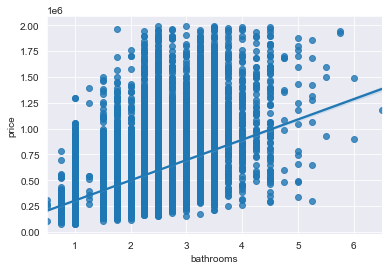

In [11]:
ax = sns.regplot(x='bathrooms', y='price', data=df)

In [12]:
df.bathrooms.value_counts().sort_values()

6.50       1
6.00       2
5.75       2
5.50       3
0.50       4
5.25       8
1.25       9
4.75       9
5.00      15
4.25      58
0.75      71
4.50      84
4.00     109
3.75     138
3.25     553
3.50     706
3.00     728
2.75    1174
1.50    1443
2.00    1928
2.25    2038
1.75    3045
1.00    3850
2.50    5356
Name: bathrooms, dtype: int64

In [13]:
df = df[df.bathrooms >= 0.75]

In [14]:
df=df[df.bathrooms < 5]

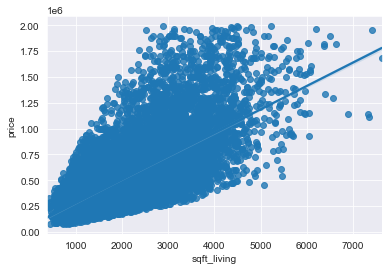

In [15]:
ax = sns.regplot(x='sqft_living', y='price', data=df)

In [16]:
df.loc[df.sqft_living > 6000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
419,8678500060,7/10/2014,1550000.0,5,4.25,6070,171626,2.0,NO,NONE,...,12 Luxury,6070,0.0,1999,0.0,98024,47.5954,-121.950,4680,211267
577,1526069135,12/11/2014,930000.0,4,4.00,6050,84942,2.5,NO,AVERAGE,...,9 Better,4150,1900.0,2009,0.0,98077,47.7466,-122.029,2700,199504
1099,7237500390,11/10/2014,1570000.0,5,4.50,6070,14731,2.0,NO,NONE,...,11 Excellent,6070,0.0,2004,NaN,98059,47.5306,-122.134,4750,13404
1537,3425059222,11/24/2014,1300000.0,6,3.50,6563,32670,2.0,NO,NONE,...,10 Very Good,5153,1410.0,2002,NaN,98005,47.6078,-122.157,2610,22651
2123,4379600030,7/29/2014,1330000.0,3,3.75,6400,76665,1.0,NO,AVERAGE,...,10 Very Good,3810,?,1966,NaN,98177,47.7313,-122.370,3430,60548
2711,7851980260,7/30/2014,1110000.0,5,3.50,7350,12231,2.0,NO,EXCELLENT,...,11 Excellent,4750,2600.0,2001,0.0,98065,47.5373,-121.865,5380,12587
10074,7767000060,9/12/2014,1900000.0,5,4.25,6510,16471,2.0,NO,GOOD,...,11 Excellent,3250,3260.0,1980,0.0,98040,47.5758,-122.242,4480,16471
10939,853600310,8/28/2014,1610000.0,5,4.50,6085,142725,3.0,NO,NONE,...,11 Excellent,6085,0.0,2000,0.0,98014,47.6085,-121.952,4830,128457
11093,4054530260,6/27/2014,1820000.0,4,4.50,6640,53330,2.0,NO,NONE,...,12 Luxury,6640,0.0,1993,0.0,98077,47.7283,-122.046,4620,68625
11673,1126069045,6/20/2014,1140000.0,6,4.25,6900,244716,2.0,NO,NONE,...,9 Better,4820,2080.0,2002,NaN,98077,47.7506,-122.012,4170,266587


In [17]:
df = df[df.sqft_living < 6000]

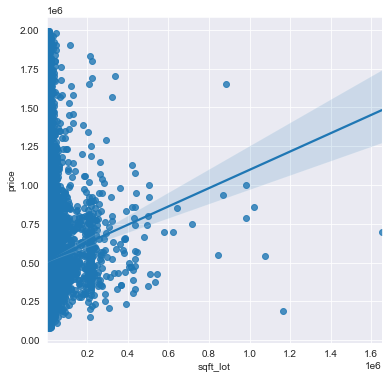

In [18]:
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.regplot(x='sqft_lot', y='price', data=df)

In [19]:
df.loc[df.sqft_lot > 300000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
145,1526069017,12/3/2014,921500.0,4,2.50,3670,315374,2.0,NO,NONE,...,9 Better,3670,0.0,1994,0.0,98077,47.7421,-122.026,2840,87991
1701,3121069036,12/8/2014,617000.0,3,1.75,3020,360241,2.0,NO,NaN,...,8 Good,3020,0.0,1992,0.0,98092,47.2662,-122.088,1890,209959
1717,1020069017,3/27/2015,700000.0,4,1.00,1300,1651359,1.0,NO,GOOD,...,6 Low Average,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581
1772,1549500370,5/5/2014,210000.0,3,1.00,1340,306848,1.0,NaN,NONE,...,5 Fair,1340,0.0,1953,0.0,98019,47.7534,-121.912,1800,128066
2755,3520069033,6/23/2014,230000.0,3,1.00,1530,389126,1.5,NO,NONE,...,7 Average,1530,0.0,1919,0.0,98022,47.1776,-122.011,1768,42148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19141,1020069042,10/1/2014,858000.0,4,3.50,4370,422967,1.0,NO,AVERAGE,...,10 Very Good,2580,1790.0,1978,0.0,98022,47.2332,-122.029,3260,422967
19878,1422069070,5/7/2015,472000.0,3,2.50,1860,415126,2.0,NO,NONE,...,7 Average,1860,0.0,2006,0.0,98038,47.3974,-122.005,2070,54014
20405,1623089165,5/6/2015,920000.0,4,3.75,4030,503989,2.0,NO,NONE,...,10 Very Good,4030,0.0,2008,NaN,98045,47.4807,-121.795,2110,71874
20795,1825079046,12/18/2014,580000.0,3,2.50,1820,374616,2.0,NO,NONE,...,7 Average,1820,0.0,1999,0.0,98014,47.6539,-121.959,1870,220654


In [20]:
df = df[df.sqft_lot < 300000]

In [21]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21215 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21215 non-null  int64  
 1   date           21215 non-null  object 
 2   price          21215 non-null  float64
 3   bedrooms       21215 non-null  int64  
 4   bathrooms      21215 non-null  float64
 5   sqft_living    21215 non-null  int64  
 6   sqft_lot       21215 non-null  int64  
 7   floors         21215 non-null  float64
 8   waterfront     18877 non-null  object 
 9   view           21154 non-null  object 
 10  condition      21215 non-null  object 
 11  grade          21215 non-null  object 
 12  sqft_above     21215 non-null  int64  
 13  sqft_basement  21215 non-null  object 
 14  yr_built       21215 non-null  int64  
 15  yr_renovated   17445 non-null  float64
 16  zipcode        21215 non-null  int64  
 17  lat            21215 non-null  float64
 18  long  

In [23]:
#import matplotlib.pyplot as plt
#plt.boxplot(df.bedrooms, vert=False)
#plt.title("Detecting outliers using Boxplot")
#plt.xlabel('Sample')

In [24]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.121500e+04,2.121500e+04,21215.00000,21215.000000,21215.000000,21215.000000,21215.000000,21215.000000,21215.000000,17445.000000,21215.000000,21215.000000,21215.000000,21215.000000,21215.000000
mean,4.596985e+09,5.160071e+05,3.34881,2.088452,2037.835871,13280.948291,1.488617,1755.853076,1970.941881,80.886787,98078.249918,47.559822,-122.214534,1967.858449,12054.803158
std,2.877679e+09,2.823144e+05,0.86848,0.728637,837.320863,26174.581858,0.539104,773.556741,29.305369,393.592013,53.524946,0.138814,0.140448,663.361364,23396.867480
min,1.000102e+06,7.800000e+04,1.00000,0.750000,370.000000,520.000000,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,399.000000,651.000000
25%,2.126059e+09,3.200000e+05,3.00000,1.500000,1420.000000,5013.000000,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.469650,-122.329000,1480.000000,5092.000000
50%,3.905100e+09,4.490000e+05,3.00000,2.250000,1900.000000,7560.000000,1.500000,1550.000000,1975.000000,0.000000,98065.000000,47.570900,-122.231000,1830.000000,7586.000000
75%,7.334600e+09,6.320000e+05,4.00000,2.500000,2510.000000,10485.500000,2.000000,2170.000000,1996.000000,0.000000,98118.000000,47.678550,-122.125500,2340.000000,10000.000000
max,9.900000e+09,1.990000e+06,6.00000,4.750000,5990.000000,295772.000000,3.500000,5990.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,438213.000000


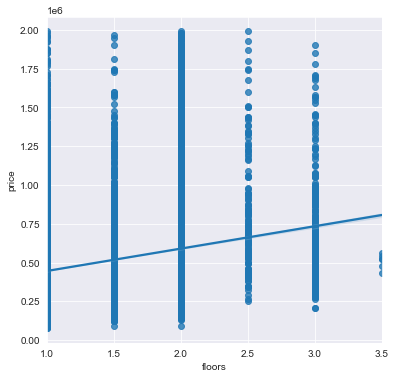

In [25]:
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.regplot(x='floors', y='price', data=df)

In [26]:
df.floors.value_counts()

1.0    10593
2.0     7997
1.5     1876
3.0      603
2.5      140
3.5        6
Name: floors, dtype: int64

In [27]:
df=df[df.floors <= 3]

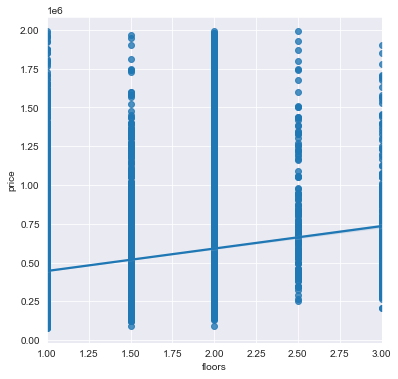

In [28]:
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.regplot(x='floors', y='price', data=df)

In [29]:
df.view.value_counts()

NONE         19225
AVERAGE        906
GOOD           460
FAIR           312
EXCELLENT      245
Name: view, dtype: int64

In [30]:
df.condition.value_counts()

Average      13765
Good          5590
Very Good     1658
Fair           167
Poor            29
Name: condition, dtype: int64

In [31]:
df = df[df.condition != 'Poor']

In [32]:
df.grade.value_counts()

7 Average        8919
8 Good           6020
9 Better         2571
6 Low Average    2020
10 Very Good     1053
11 Excellent      296
5 Fair            229
12 Luxury          44
4 Low              26
3 Poor              1
13 Mansion          1
Name: grade, dtype: int64

In [33]:
df = df[df.grade!='12 Luxury']
df = df[df.grade!='4 Low']
df = df[df.grade!='13 Mansion']
df = df[df.grade!='3 Poor']

In [34]:
df.grade.value_counts()

7 Average        8919
8 Good           6020
9 Better         2571
6 Low Average    2020
10 Very Good     1053
11 Excellent      296
5 Fair            229
Name: grade, dtype: int64

In [35]:
df.zipcode.value_counts().sort_values()

98039     29
98148     55
98024     73
98102     97
98010     97
        ... 
98117    549
98052    571
98038    581
98115    582
98103    595
Name: zipcode, Length: 70, dtype: int64

Outliers based on low data entries of cities/zipcodes: \
98010, 'Black Diamond'\
98014, 'Carnation'\
98024, 'Fall City'\
98039, 'Medina'\
98013, 'Vashon'\
98070, 'Vashon'

In [36]:
df = df[df.zipcode != 98010]
df = df[df.zipcode != 98014]
df = df[df.zipcode != 98024]
df = df[df.zipcode != 98039]
df = df[df.zipcode != 98013]
df = df[df.zipcode != 98070]

In [37]:
df.zipcode.nunique()

65

#### Target and predictors

In [38]:
# The prediction target for this analysis is the price of the home sold, \
# so we separate the data into X and y accordingly:
y = df['price']
X = df.drop('price', axis=1)

In [39]:
# Separating the data into a train and test sets befrore performing preprocessing steps:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=46)

In [40]:
# Ensure X rows are matching y values
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 15513 rows and 20 columns
y_train is a Series with 15513 values


## 2. Data Preparation

### 2.1 Detecting and dealing with missing values

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20685 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20685 non-null  int64  
 1   date           20685 non-null  object 
 2   price          20685 non-null  float64
 3   bedrooms       20685 non-null  int64  
 4   bathrooms      20685 non-null  float64
 5   sqft_living    20685 non-null  int64  
 6   sqft_lot       20685 non-null  int64  
 7   floors         20685 non-null  float64
 8   waterfront     18401 non-null  object 
 9   view           20625 non-null  object 
 10  condition      20685 non-null  object 
 11  grade          20685 non-null  object 
 12  sqft_above     20685 non-null  int64  
 13  sqft_basement  20685 non-null  object 
 14  yr_built       20685 non-null  int64  
 15  yr_renovated   17018 non-null  float64
 16  zipcode        20685 non-null  int64  
 17  lat            20685 non-null  float64
 18  long  

In [42]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2284
view               60
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3667
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

***
#### Data Cleaning tasks for dataset: 
    * check on duplicates. 
    * 'date' is an object. It needs to be converted to date. We also will break it into 'yr_sold' and 'm_sold' variables. 
    * 'waterfront' has 2,376 NaN values. It is most likely for the houses that don't have a waterfront view. 
    * 'view' has 63 NaN values. Most likely these houses don't have a view. We will convert it to None. 
    * 'yr_renovated' has 3,842 missing values. Probably these houses haven't been renovated. We will replace NaN with 0. However, since we are not 100% sure, we will use MissingIndicator to create a new column to represent values that were missing. 
    * 'sqft_basement' is obj. Convert to float64.
    * 'zipcode' is int. It needs to be converted to Categorical variable. 
    * create a new column 'city' to associate zipcodes with corresponding city. 
***

##### Duplicates

In [43]:
# check on duplicates
duplicates = X_train[X_train.duplicated()]
len(duplicates)

0

In [44]:
duplicates_id = X_train[X_train.id.duplicated(keep=False)]
len(duplicates_id)

162

In [45]:
duplicates_id.sort_values('id')

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2494,1000102,9/16/2014,6,3.00,2400,9373,2.0,NaN,NONE,Average,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2495,1000102,4/22/2015,6,3.00,2400,9373,2.0,NO,NONE,Average,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16801,7200179,4/24/2015,2,1.00,840,12750,1.0,NO,NONE,Average,6 Low Average,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
16800,7200179,10/16/2014,2,1.00,840,12750,1.0,NO,NONE,Average,6 Low Average,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
7786,251300110,1/14/2015,3,2.25,2510,12013,2.0,NO,NONE,Average,8 Good,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,9353300600,3/26/2015,3,1.50,1360,10726,1.0,NO,NONE,Good,7 Average,1360,0.0,1966,0.0,98059,47.4948,-122.134,1650,10726
2492,9407110710,2/26/2015,3,1.75,1510,8400,1.0,NO,NONE,Fair,7 Average,980,530.0,1979,0.0,98045,47.4476,-121.771,1500,10125
2491,9407110710,11/7/2014,3,1.75,1510,8400,1.0,NO,NONE,Fair,7 Average,980,530.0,1979,0.0,98045,47.4476,-121.771,1500,10125
15186,9834200305,2/10/2015,3,1.00,1790,3876,1.5,NO,NONE,Very Good,7 Average,1090,700.0,1904,0.0,98144,47.5750,-122.288,1360,4080


In [46]:
#Looks like we have houses with identical ids that have been sold multiple times. 
# We will investigate it further for Market Housing trends. 

##### 'date' 

In [47]:
# convert 'date' values from object to date. 
X_train['date'] = X_train['date'].astype('datetime64[ns]')

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15513 entries, 14138 to 16247
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15513 non-null  int64         
 1   date           15513 non-null  datetime64[ns]
 2   bedrooms       15513 non-null  int64         
 3   bathrooms      15513 non-null  float64       
 4   sqft_living    15513 non-null  int64         
 5   sqft_lot       15513 non-null  int64         
 6   floors         15513 non-null  float64       
 7   waterfront     13787 non-null  object        
 8   view           15466 non-null  object        
 9   condition      15513 non-null  object        
 10  grade          15513 non-null  object        
 11  sqft_above     15513 non-null  int64         
 12  sqft_basement  15513 non-null  object        
 13  yr_built       15513 non-null  int64         
 14  yr_renovated   12767 non-null  float64       
 15  zipcode        

In [49]:
X_train.date.describe()

count                   15513
unique                    362
top       2014-06-23 00:00:00
freq                      107
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

In [50]:
X_train['date']

14138   2015-04-22
16113   2014-12-15
10703   2014-08-19
12213   2014-06-20
6352    2015-01-05
           ...    
3966    2015-04-20
17816   2014-10-10
19688   2015-04-16
19727   2014-09-15
16247   2015-02-11
Name: date, Length: 15513, dtype: datetime64[ns]

In [51]:
# create additional two columns with 'yr_sold' and 'mo_sold'
import datetime as dt
X_train['yr_sold'] = X_train['date'].dt.strftime('%Y')
X_train['mo_sold'] = X_train['date'].dt.strftime('%m')
X_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mo_sold
14138,7779200355,2015-04-22,3,3.00,3610,17483,2.0,NO,AVERAGE,Good,...,0.0,1954,NaN,98146,47.4852,-122.357,2230,12600,2015,04
16113,3818700190,2014-12-15,4,1.75,2520,15205,1.0,NO,NONE,Good,...,480.0,1954,0.0,98028,47.7642,-122.264,1680,10000,2014,12
10703,6145601890,2014-08-19,5,1.75,1960,3748,1.0,NO,NONE,Average,...,980.0,1965,0.0,98133,47.7027,-122.349,1410,3844,2014,08
12213,1251200045,2014-06-20,5,3.25,3840,4800,3.0,NO,GOOD,Average,...,1090.0,2008,NaN,98144,47.5929,-122.290,2060,4800,2014,06
6352,3450300430,2015-01-05,4,1.50,1730,7700,1.0,NaN,NONE,Good,...,720.0,1963,0.0,98059,47.4996,-122.163,1650,8066,2015,01


In [52]:
X_train['yr_sold'] = X_train['yr_sold'].astype('int')
X_train['mo_sold'] = X_train['mo_sold'].astype('int')

##### 'waterfront'

In [53]:
# replace 'waterfront' nan with "NO"
X_train.waterfront.unique()

array(['NO', nan, 'YES'], dtype=object)

In [54]:
X_train.waterfront.fillna(value='NO', inplace=True)

In [55]:
X_train.waterfront.unique()

array(['NO', 'YES'], dtype=object)

##### 'view'

In [56]:
# replace 'view' nan with 'NONE'
X_train.view.value_counts()

NONE         14122
AVERAGE        628
GOOD           339
FAIR           218
EXCELLENT      159
Name: view, dtype: int64

In [57]:
X_train.view.fillna(value='NONE', inplace=True)

In [58]:
X_train.view.value_counts()

NONE         14169
AVERAGE        628
GOOD           339
FAIR           218
EXCELLENT      159
Name: view, dtype: int64

##### 'yr_renovated'

In [59]:
# fill nans of 'yr_renovated' with 0.0
X_train.yr_renovated.value_counts()

0.0       12248
2014.0       56
2007.0       23
2013.0       21
2003.0       21
          ...  
1965.0        1
1971.0        1
1978.0        1
1976.0        1
1959.0        1
Name: yr_renovated, Length: 66, dtype: int64

In [60]:
X_train.yr_renovated.isna().sum()

2746

In [61]:
# Assuming that NaN is indicating that a house hasn't been renovated. 
# We will first convert '0.0' values to NaN and use MissingIndicator to create a new colunm with whether \
# or not a house been renovated (binary column)
# Then we will convert all NaNs to 0.0 on 'yr_renovated' no make all values numeric. 


In [62]:
X_train = X_train.replace(0.0,np.NaN)
X_train.yr_renovated

14138   NaN
16113   NaN
10703   NaN
12213   NaN
6352    NaN
         ..
3966    NaN
17816   NaN
19688   NaN
19727   NaN
16247   NaN
Name: yr_renovated, Length: 15513, dtype: float64

In [63]:
# (1) Identify data to be transformed
# We only want missing indicators for yr_renovated
yr_renovated = X_train[['yr_renovated']]

# (2) Instantiate the transformer object
missing_indicator = MissingIndicator()

# (3) Fit the transformer object on yr_renovated
missing_indicator.fit(yr_renovated)

# (4) Transform yr_renovated and assign the result
# to yr_renovated_missing_train
yr_renovated_missing_train = missing_indicator.transform(yr_renovated)

# Visually inspect yr_renovated_missing_train
yr_renovated_missing_train

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [64]:
# yr_renovated_missing_train should be a NumPy array
assert type(yr_renovated_missing_train) == np.ndarray

# We should have the same number of rows as the full X_train
assert yr_renovated_missing_train.shape[0] == X_train.shape[0]

# But we should only have 1 column
assert yr_renovated_missing_train.shape[1] == 1

In [65]:
X_train["Yr_renovated_None"] = yr_renovated_missing_train
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mo_sold,Yr_renovated_None
14138,7779200355,2015-04-22,3,3.00,3610,17483,2.0,NO,AVERAGE,Good,...,1954,NaN,98146,47.4852,-122.357,2230,12600,2015,4,True
16113,3818700190,2014-12-15,4,1.75,2520,15205,1.0,NO,NONE,Good,...,1954,NaN,98028,47.7642,-122.264,1680,10000,2014,12,True
10703,6145601890,2014-08-19,5,1.75,1960,3748,1.0,NO,NONE,Average,...,1965,NaN,98133,47.7027,-122.349,1410,3844,2014,8,True
12213,1251200045,2014-06-20,5,3.25,3840,4800,3.0,NO,GOOD,Average,...,2008,NaN,98144,47.5929,-122.290,2060,4800,2014,6,True
6352,3450300430,2015-01-05,4,1.50,1730,7700,1.0,NO,NONE,Good,...,1963,NaN,98059,47.4996,-122.163,1650,8066,2015,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,4438000165,2015-04-20,2,1.00,730,6728,1.0,NO,NONE,Average,...,1953,NaN,98148,47.4275,-122.324,1170,7034,2015,4,True
17816,1771000970,2014-10-10,3,1.00,1160,9600,1.0,NO,NONE,Good,...,1967,NaN,98077,47.7419,-122.073,1160,9730,2014,10,True
19688,1604601804,2015-04-16,3,3.75,2260,2050,2.0,NO,NONE,Average,...,2010,NaN,98118,47.5660,-122.290,2130,3082,2015,4,True
19727,6790830060,2014-09-15,4,3.75,4120,8258,2.0,NO,NONE,Average,...,2012,NaN,98075,47.5872,-122.055,3730,8332,2014,9,True


In [66]:
X_train.Yr_renovated_None.value_counts()

True     14994
False      519
Name: Yr_renovated_None, dtype: int64

In [67]:
X_train['Yr_renovated_None'] = X_train['Yr_renovated_None'].astype('int64')

In [68]:
X_train.yr_renovated.fillna(value=0.0, inplace=True)

In [69]:
X_train.yr_renovated.value_counts()

0.0       14994
2014.0       56
2007.0       23
2013.0       21
2003.0       21
          ...  
1965.0        1
1971.0        1
1978.0        1
1976.0        1
1959.0        1
Name: yr_renovated, Length: 66, dtype: int64

##### 'grade'

In [70]:
# check on 'grade' values
X_train.grade.unique()

array(['8 Good', '7 Average', '10 Very Good', '9 Better', '11 Excellent',
       '6 Low Average', '5 Fair'], dtype=object)

##### 'sqft_basement'

In [71]:
X_train.sqft_basement.unique()

array(['0.0', '480.0', '980.0', '1090.0', '720.0', '80.0', '340.0',
       '630.0', '640.0', '330.0', '360.0', '470.0', '830.0', '1140.0',
       '1240.0', '900.0', '?', '300.0', '700.0', '800.0', '1010.0',
       '200.0', '600.0', '210.0', '1050.0', '670.0', '990.0', '950.0',
       '1080.0', '150.0', '650.0', '280.0', '620.0', '500.0', '1420.0',
       '1160.0', '1220.0', '1000.0', '516.0', '540.0', '120.0', '440.0',
       '920.0', '90.0', '780.0', '1070.0', '860.0', '1320.0', '140.0',
       '840.0', '1130.0', '690.0', '10.0', '1120.0', '680.0', '760.0',
       '870.0', '310.0', '770.0', '260.0', '380.0', '1400.0', '1470.0',
       '790.0', '490.0', '220.0', '400.0', '580.0', '1460.0', '810.0',
       '1910.0', '170.0', '1780.0', '1110.0', '2150.0', '1250.0', '730.0',
       '940.0', '530.0', '710.0', '510.0', '880.0', '820.0', '740.0',
       '1500.0', '100.0', '570.0', '890.0', '1330.0', '1490.0', '1230.0',
       '1100.0', '750.0', '250.0', '1360.0', '1030.0', '370.0', '850.0',


In [72]:
X_train[X_train['sqft_basement']=='?']

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mo_sold,Yr_renovated_None
6311,9547205260,2014-08-15,3,1.75,1740,3060,1.0,NO,NONE,Very Good,...,1930,2014.0,98115,47.6816,-122.310,1800,3960,2014,8,0
14589,2624049103,2015-03-25,2,1.00,1250,4576,1.0,NO,NONE,Average,...,1925,0.0,98118,47.5387,-122.266,1550,5000,2015,3,1
21109,3438500250,2014-06-23,5,3.25,2910,5027,2.0,NO,NONE,Average,...,2013,0.0,98106,47.5543,-122.359,2910,5027,2014,6,1
3017,7454000110,2015-01-27,2,1.00,670,7844,1.0,NO,NONE,Average,...,1942,0.0,98126,47.5165,-122.372,740,7218,2015,1,1
3204,9510970090,2014-11-21,4,2.50,2120,3220,2.0,NO,NONE,Average,...,2005,0.0,98052,47.6662,-122.083,2120,3547,2014,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9402,522069111,2015-01-27,4,3.00,2620,214750,2.0,NO,NONE,Average,...,1992,0.0,98058,47.4239,-122.068,2060,212137,2015,1,1
42,7203220400,2014-07-07,5,2.75,3595,5639,2.0,NO,NONE,Average,...,2014,0.0,98053,47.6848,-122.016,3625,5639,2014,7,1
5953,8663310050,2014-10-06,4,2.50,2440,10423,1.0,NO,NONE,Average,...,1955,0.0,98034,47.7250,-122.172,1990,7758,2014,10,1
15914,8682261190,2015-01-12,2,1.75,1680,4500,1.0,NO,NONE,Average,...,2004,0.0,98053,47.7132,-122.032,1670,4500,2015,1,1


In [73]:
# replace '?' value with '0.0'
X_train.sqft_basement.replace(to_replace='?',
    value='0.01',
    inplace=True,)

In [74]:
# 'sqft_basement' obj convert to float
X_train.sqft_basement = X_train.sqft_basement.astype('float')
X_train.sqft_basement.dtype

dtype('float64')

In [75]:
# replace 0.0 value with mean
sqft_basement_mean = X_train.sqft_basement.mean()
X_train.sqft_basement.replace(to_replace= 0.01,
    value=sqft_basement_mean,
    inplace=True,)

X_train.sqft_basement.head()

14138       0.0
16113     480.0
10703     980.0
12213    1090.0
6352      720.0
Name: sqft_basement, dtype: float64

In [76]:
df.sqft_basement.value_counts()

0.0       12269
?           438
600.0       210
500.0       203
700.0       202
          ...  
1798.0        1
516.0         1
65.0          1
1990.0        1
1481.0        1
Name: sqft_basement, Length: 274, dtype: int64

In [77]:
X_train.sqft_basement.value_counts()

0.000000       9218
277.148668      329
600.000000      156
400.000000      151
500.000000      151
               ... 
1525.000000       1
2010.000000       1
207.000000        1
2000.000000       1
915.000000        1
Name: sqft_basement, Length: 256, dtype: int64

##### 'condition'

In [78]:
X_train.condition.unique()

array(['Good', 'Average', 'Very Good', 'Fair'], dtype=object)

##### 'zipcode'

In [79]:
# convert 'zipcode' from int to obj
X_train.zipcode = df.zipcode.astype('string')
X_train.zipcode.dtype

StringDtype

In [80]:
X_train.zipcode.nunique()

65

In [81]:
city_zipcode_table = pd.read_html('https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033')

In [82]:
city_zipcode_1 = city_zipcode_table[2]
city_zipcode_2 = city_zipcode_table[3]
city_zipcode_3 = city_zipcode_table[4]
city_zipcode = pd.concat([city_zipcode_1, city_zipcode_2, city_zipcode_3])
city_zipcode

,Zip Code,City,County
0,98001,Algona,King County
1,98001,Auburn,King County
2,98001,Federal Way,King County
3,98002,Auburn,King County
4,98003,Auburn,King County
...,...,...,...
44,98198,Seatac,King County
45,98198,Seattle,King County
46,98199,Seattle,King County
47,98224,Baring,King County


In [83]:
city_dict = dict(zip(city_zipcode['Zip Code'], city_zipcode['City']))
len(city_dict)
city_dict

{98001: 'Federal Way',
 98002: 'Auburn',
 98003: 'Federal Way',
 98004: 'Yarrow Point',
 98005: 'Bellevue',
 98006: 'Bellevue',
 98007: 'Bellevue',
 98008: 'Bellevue',
 98009: 'Bellevue',
 98010: 'Black Diamond',
 98011: 'Bothell',
 98013: 'Vashon',
 98014: 'Carnation',
 98015: 'Bellevue',
 98019: 'Duvall',
 98022: 'Enumclaw',
 98023: 'Federal Way',
 98024: 'Fall City',
 98025: 'Hobart',
 98027: 'Issaquah',
 98028: 'Bothell',
 98029: 'Issaquah',
 98030: 'Kent',
 98031: 'Kent',
 98032: 'Kent',
 98033: 'Kirkland',
 98034: 'Kirkland',
 98035: 'Kent',
 98038: 'Maple Valley',
 98039: 'Medina',
 98040: 'Mercer Island',
 98041: 'Bothell',
 98042: 'Kent',
 98045: 'North Bend',
 98047: 'Pacific',
 98050: 'Preston',
 98051: 'Ravensdale',
 98052: 'Redmond',
 98053: 'Redmond',
 98054: 'Redondo',
 98055: 'Renton',
 98056: 'Renton',
 98057: 'Renton',
 98058: 'Renton',
 98059: 'Renton',
 98062: 'Seahurst',
 98063: 'Federal Way',
 98064: 'Kent',
 98065: 'Snoqualmie',
 98068: 'Snoqualmie',
 98070: 'Vas

In [84]:
# manually imputing one zipcode missing from the list. 
city_dict[98077] = 'Woodinville'

In [85]:
X_train.zipcode = X_train.zipcode.astype('int')

In [86]:
X_train['city'] = X_train.zipcode.apply(lambda x: city_dict[x])
X_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mo_sold,Yr_renovated_None,city
14138,7779200355,2015-04-22,3,3.00,3610,17483,2.0,NO,AVERAGE,Good,...,0.0,98146,47.4852,-122.357,2230,12600,2015,4,1,Seattle
16113,3818700190,2014-12-15,4,1.75,2520,15205,1.0,NO,NONE,Good,...,0.0,98028,47.7642,-122.264,1680,10000,2014,12,1,Bothell
10703,6145601890,2014-08-19,5,1.75,1960,3748,1.0,NO,NONE,Average,...,0.0,98133,47.7027,-122.349,1410,3844,2014,8,1,Shoreline
12213,1251200045,2014-06-20,5,3.25,3840,4800,3.0,NO,GOOD,Average,...,0.0,98144,47.5929,-122.290,2060,4800,2014,6,1,Seattle
6352,3450300430,2015-01-05,4,1.50,1730,7700,1.0,NO,NONE,Good,...,0.0,98059,47.4996,-122.163,1650,8066,2015,1,1,Renton


In [87]:
X_train.city.nunique()

20

In [88]:
X_train.city.value_counts()

Seattle          5116
Renton           1171
Redmond          1042
Kent              896
Shoreline         871
Federal Way       851
Issaquah          798
Bellevue          780
Kirkland          735
Tukwila           624
Maple Valley      443
Auburn            412
Bothell           363
Woodinville       336
Snoqualmie        222
Yarrow Point      201
Mercer Island     180
Enumclaw          169
North Bend        163
Duvall            140
Name: city, dtype: int64

Seeing that cities like Carnation, Vashon, Black Diamond, Fall City, and Medina have low frequency of 
data entries (94, 80, 74, 51, 27 respectively), we will map them to their corresponding zip codes and 
 treat them as outliers. We will process the outliers in 'Outliers' section of this notebook prior to 
 train-test split. 

In [89]:
sorted(city_dict.items(), key = lambda kv: kv[1])

[(98002, 'Auburn'),
 (98071, 'Auburn'),
 (98092, 'Auburn'),
 (98224, 'Baring'),
 (98005, 'Bellevue'),
 (98006, 'Bellevue'),
 (98007, 'Bellevue'),
 (98008, 'Bellevue'),
 (98009, 'Bellevue'),
 (98015, 'Bellevue'),
 (98010, 'Black Diamond'),
 (98011, 'Bothell'),
 (98028, 'Bothell'),
 (98041, 'Bothell'),
 (98014, 'Carnation'),
 (98019, 'Duvall'),
 (98022, 'Enumclaw'),
 (98024, 'Fall City'),
 (98001, 'Federal Way'),
 (98003, 'Federal Way'),
 (98023, 'Federal Way'),
 (98063, 'Federal Way'),
 (98093, 'Federal Way'),
 (98025, 'Hobart'),
 (98027, 'Issaquah'),
 (98029, 'Issaquah'),
 (98075, 'Issaquah'),
 (98030, 'Kent'),
 (98031, 'Kent'),
 (98032, 'Kent'),
 (98035, 'Kent'),
 (98042, 'Kent'),
 (98064, 'Kent'),
 (98033, 'Kirkland'),
 (98034, 'Kirkland'),
 (98083, 'Kirkland'),
 (98038, 'Maple Valley'),
 (98039, 'Medina'),
 (98040, 'Mercer Island'),
 (98045, 'North Bend'),
 (98047, 'Pacific'),
 (98050, 'Preston'),
 (98051, 'Ravensdale'),
 (98052, 'Redmond'),
 (98053, 'Redmond'),
 (98073, 'Redmond'),

98010, 'Black Diamond'\
98014, 'Carnation'\
98024, 'Fall City'\
98039, 'Medina'\
98013, 'Vashon'\
98070, 'Vashon'

### 2.2  Checking on Normality of Data

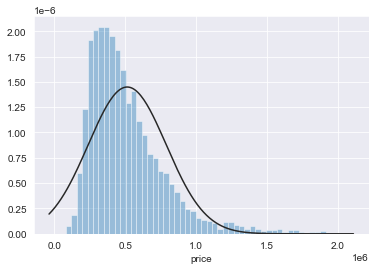

In [90]:
#Checking on normality of target data
from scipy.stats import norm
ax = sns.distplot(y_train, fit=norm, kde=False)

Target ('price') data is skewed left with a heavy right tail. 

In [91]:
# Checking on normality of predictor data 
X_train.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_sold', 'mo_sold',
       'Yr_renovated_None', 'city'],
      dtype='object')

In [92]:
# data subsetting and check on data normality

subset = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 
          'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 
          'sqft_lot15', 'waterfront', 'view', 'grade', 'condition', 'Yr_renovated_None', 'yr_sold', 
          'mo_sold', 'city']
X_train_subset = X_train.loc[:, subset]

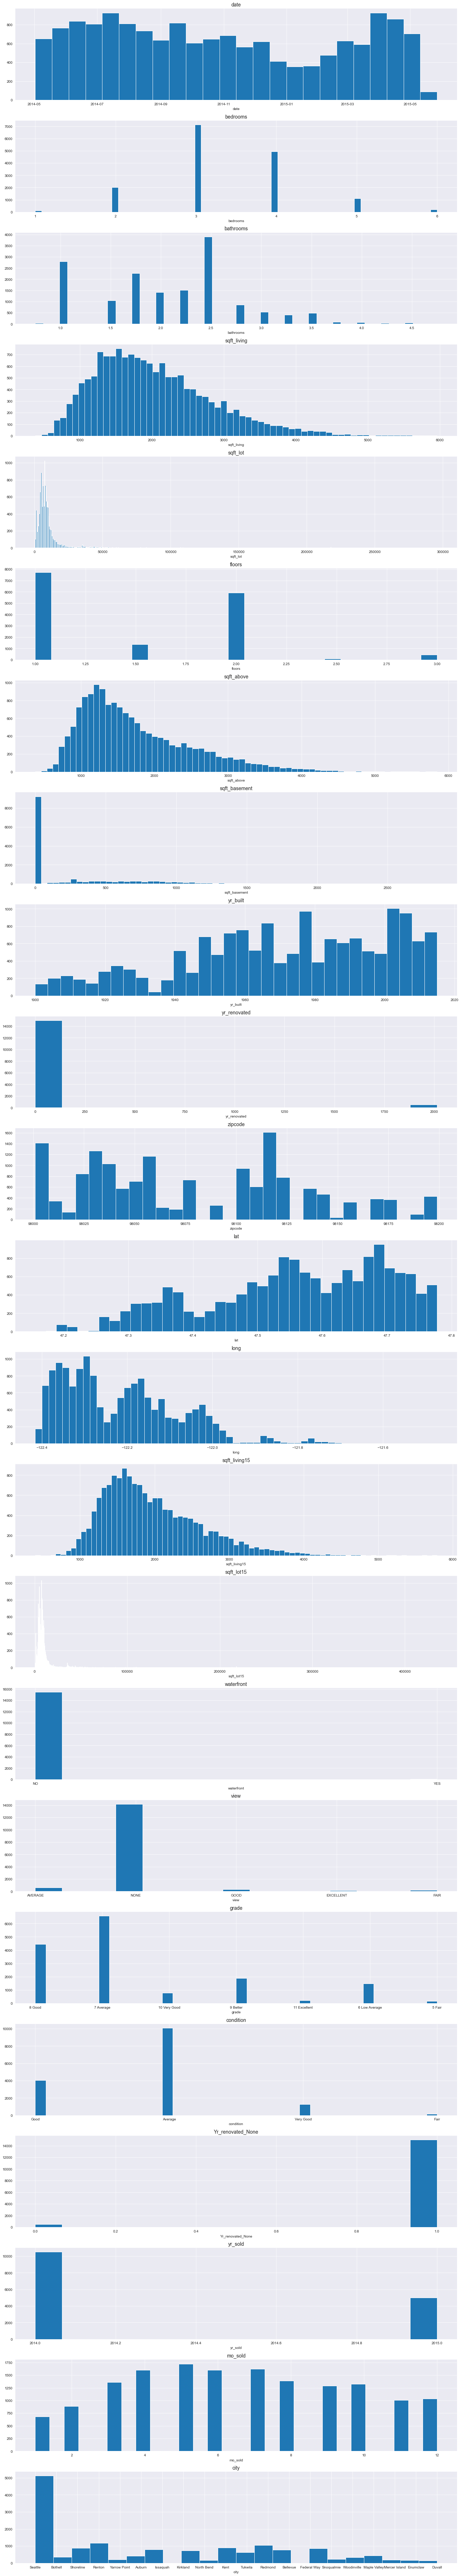

In [93]:
#X_train_subset.hist()
fig, axes = plt.subplots(nrows=23, ncols=1, figsize=(18,100))

for ax, column in zip(axes.flatten(), X_train_subset.columns):
    ax.hist(X_train_subset[column], bins = 'auto', label=column)
    ax.set_title(f'{column}', fontsize = 14)
    ax.set_xlabel(column)

fig.tight_layout()

In [94]:
# You observations here 

### 2.3 Checking in Linearity Assumption 

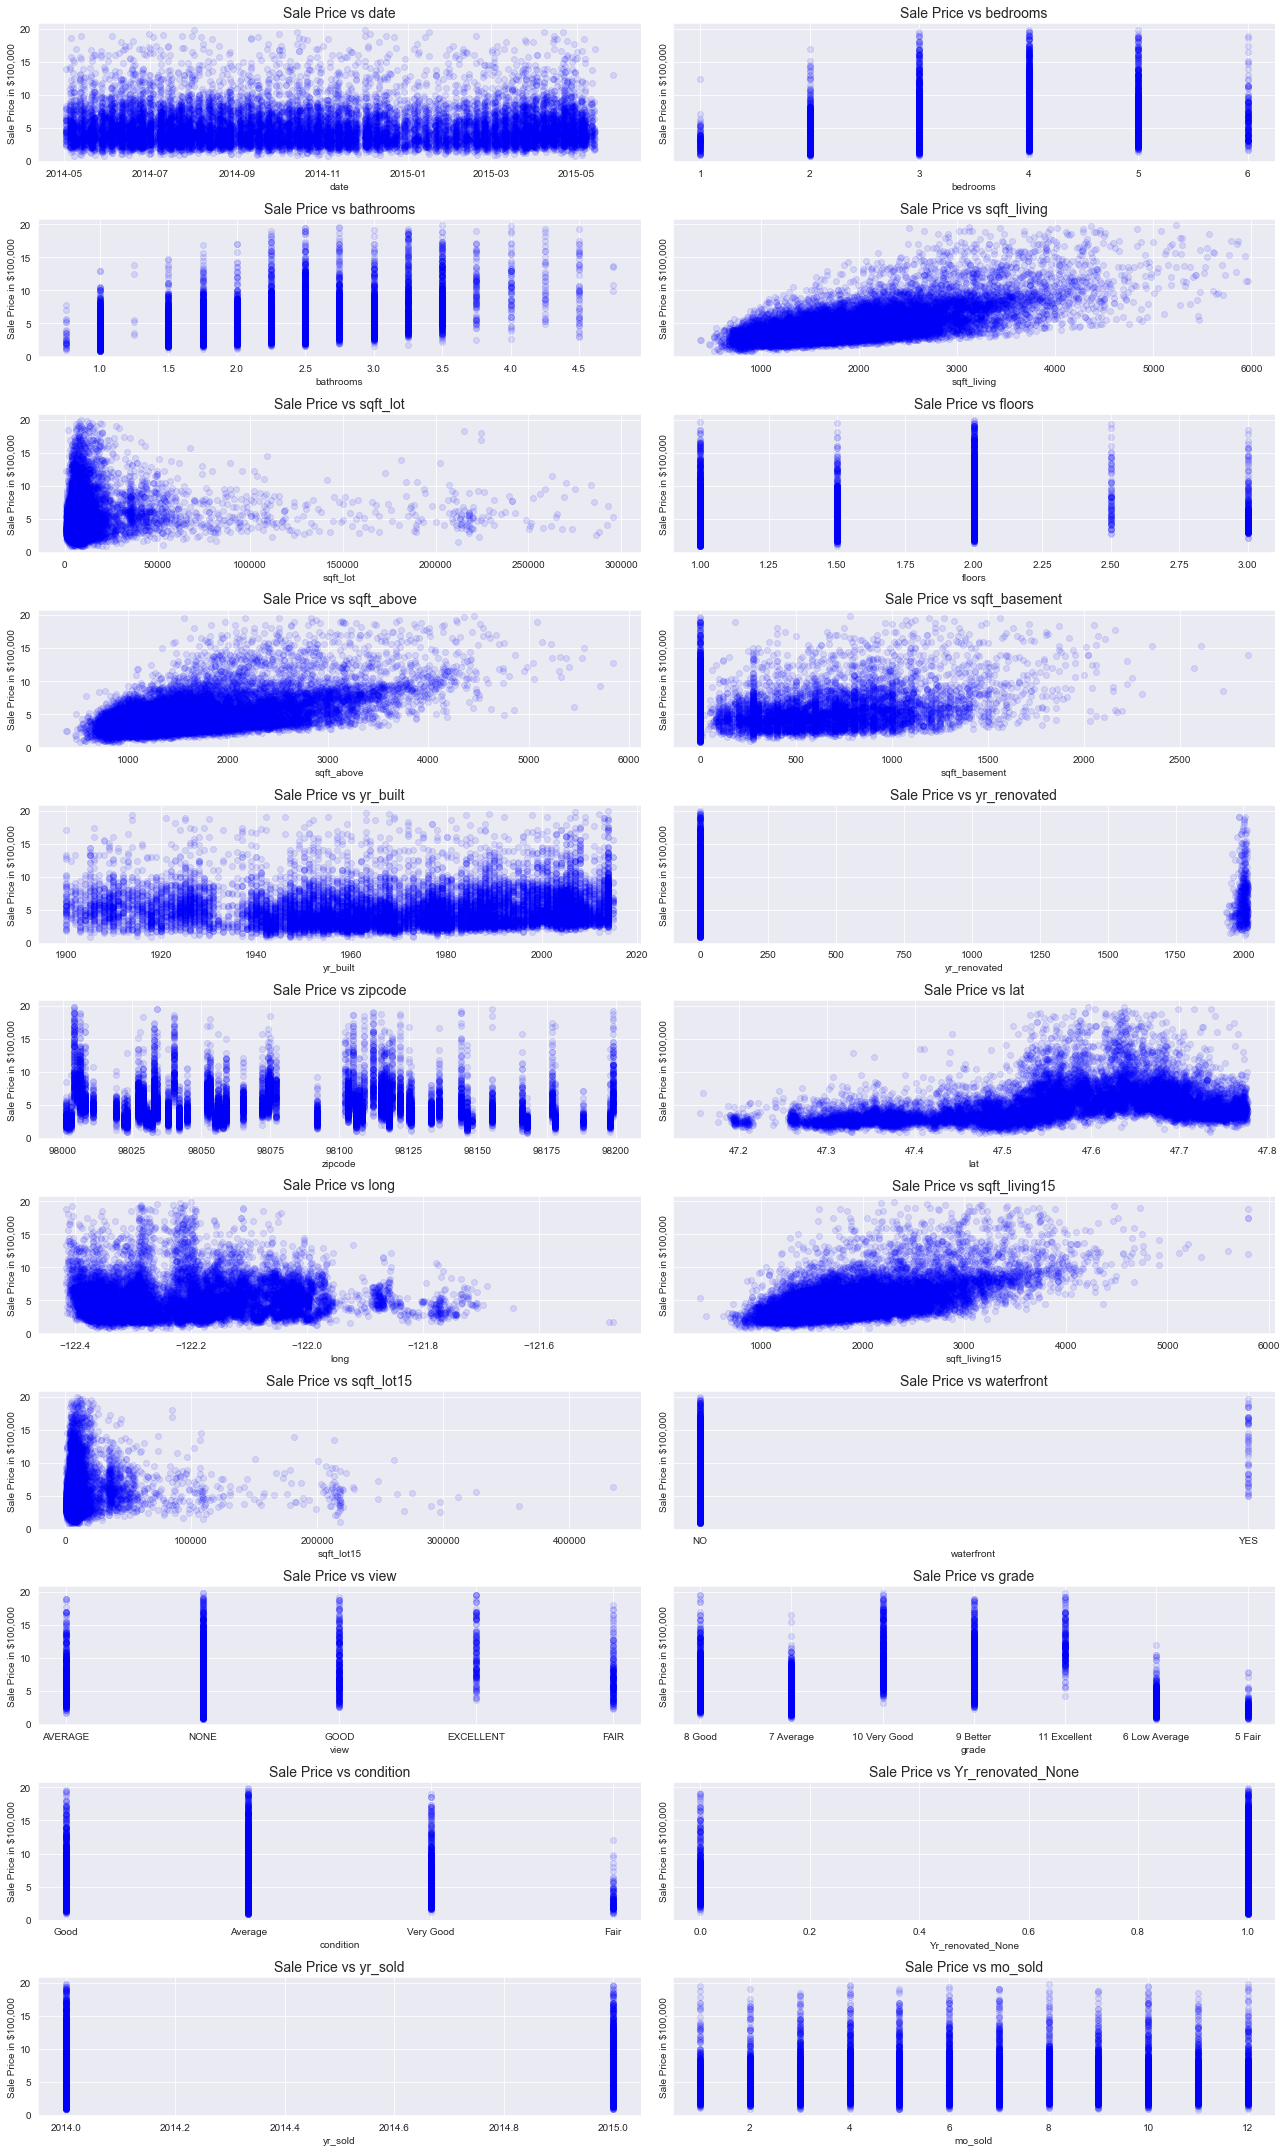

In [95]:
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(18,30), sharey=True)

for ax, column in zip(axes.flatten(), X_train_subset.columns):
    ax.scatter(X_train_subset[column], y_train / 100_000, label=column, color = 'b', alpha=.1)
    ax.set_title(f'Sale Price vs {column}', fontsize = 14)
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

In [96]:
# Continuous var: 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', \
# 'sqft_lot15'.
# For now go under Continuous: 'bedrooms', 'bathrooms', 'floors' 
# Categorical var: 'zipcode', 'waterfront', 'view', 'Grade', 'condition', 'Yr_renovated_Missing', 'city'
# Unclear var: 'date', 'yr_built', 'yr_renovated'

In [97]:
#Linearity is appearring to be prominent between 'price' and these features: 'sqft_living', 'sqft_above', \
#'sqft_living15'

### 2.4 Converting Categorical variables to numeric (one-hot encoder)

In [98]:
# Categorical var: 'zipcode', 'waterfront', 'view', 'grade', 'condition', 'city' that needs to be converted to 
# numeric value through One-Hot-Encoder

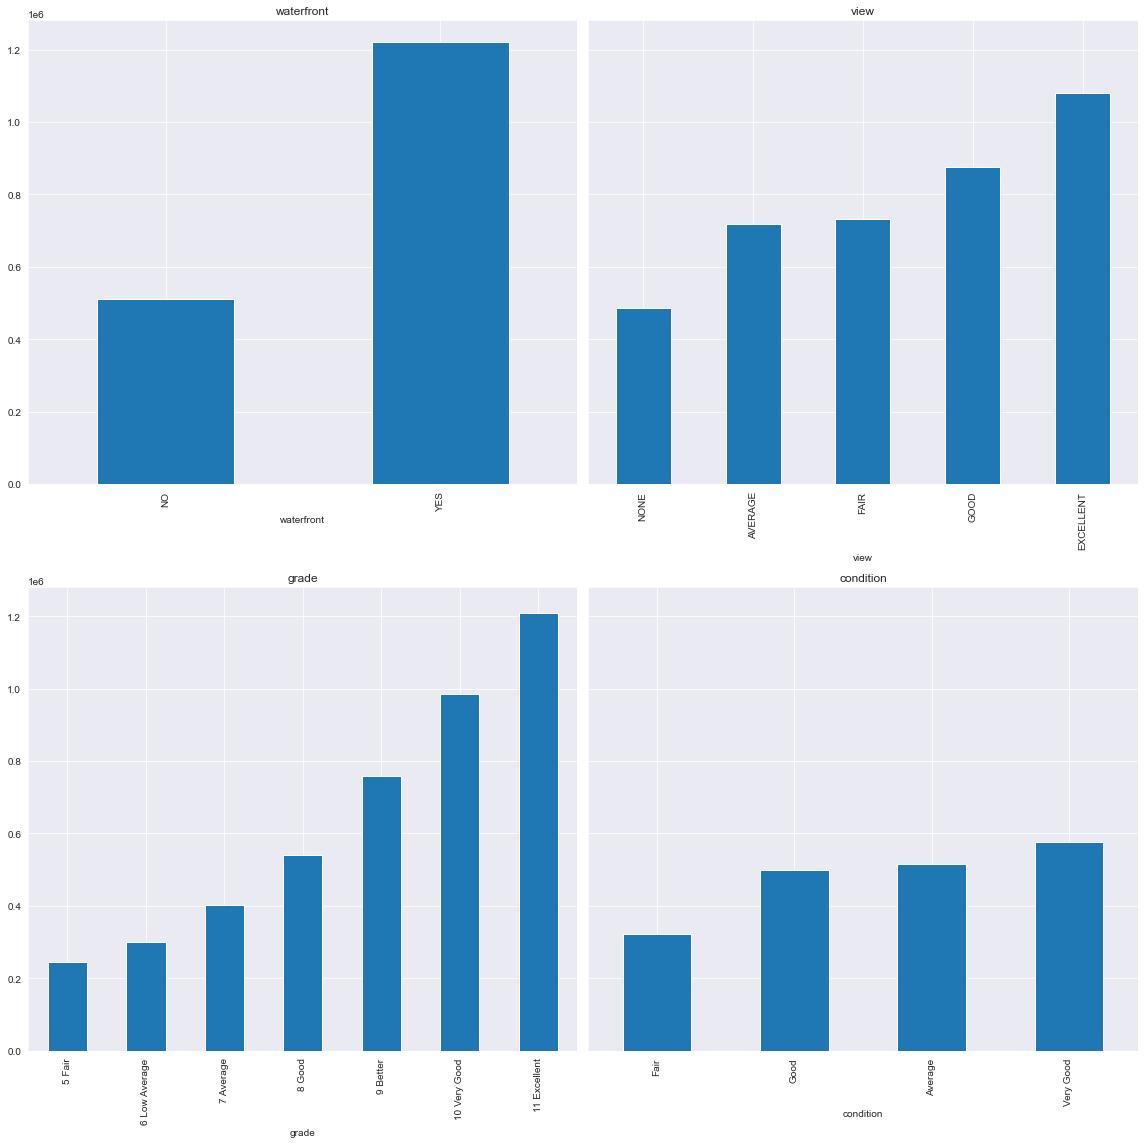

In [99]:
# Plot categorical variables against price with a bar graph. 

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,16), sharey=True)

categoricals = ['waterfront', 'view', 'grade', 'condition']

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [100]:
# Create dummy variables for four categorical features
categoricals = ['waterfront', 'view', 'grade', 'condition', 'city']
dummies = pd.get_dummies(X_train_subset[categoricals], prefix=categoricals, drop_first=True)


In [101]:
X_train_preprocessed = X_train_subset.drop(categoricals, axis=1)

X_train_preprocessed = pd.concat([X_train_preprocessed, dummies], axis=1)

X_train_preprocessed.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Woodinville,city_Yarrow Point
14138,2015-04-22,3,3.00,3610,17483,2.0,3610,0.0,1954,0.0,...,0,0,0,0,1,0,0,0,0,0
16113,2014-12-15,4,1.75,2520,15205,1.0,2040,480.0,1954,0.0,...,0,0,0,0,0,0,0,0,0,0
10703,2014-08-19,5,1.75,1960,3748,1.0,980,980.0,1965,0.0,...,0,0,0,0,0,1,0,0,0,0
12213,2014-06-20,5,3.25,3840,4800,3.0,2750,1090.0,2008,0.0,...,0,0,0,0,1,0,0,0,0,0
6352,2015-01-05,4,1.50,1730,7700,1.0,1010,720.0,1963,0.0,...,0,0,0,1,0,0,0,0,0,0


In [102]:
X_train_preprocessed.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Yr_renovated_None',
       'yr_sold', 'mo_sold', 'waterfront_YES', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'grade_11 Excellent', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good',
       'condition_Very Good', 'city_Bellevue', 'city_Bothell', 'city_Duvall',
       'city_Enumclaw', 'city_Federal Way', 'city_Issaquah', 'city_Kent',
       'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
       'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
       'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
       'city_Yarrow Point'],
      dtype='object')

In [103]:
X_train_preprocessed_2 = X_train_preprocessed.copy()
X_train_preprocessed_2.yr_sold = X_train_preprocessed_2.yr_sold.astype('object')
X_train_preprocessed_2.mo_sold = X_train_preprocessed_2.mo_sold.astype('object')

In [104]:
# Create dummy variables for two additional categorical features: yr_sold and mo_sold
categoricals_2 = ['yr_sold', 'mo_sold']
dummies2 = pd.get_dummies(X_train_preprocessed_2[categoricals_2], prefix=categoricals_2, drop_first=True)


In [105]:
X_train_preprocessed_2 = X_train_preprocessed_2.drop(categoricals_2, axis=1)

X_train_preprocessed_2 = pd.concat([X_train_preprocessed_2, dummies2], axis=1)

X_train_preprocessed_2.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,mo_sold_3,mo_sold_4,mo_sold_5,mo_sold_6,mo_sold_7,mo_sold_8,mo_sold_9,mo_sold_10,mo_sold_11,mo_sold_12
14138,2015-04-22,3,3.00,3610,17483,2.0,3610,0.0,1954,0.0,...,0,1,0,0,0,0,0,0,0,0
16113,2014-12-15,4,1.75,2520,15205,1.0,2040,480.0,1954,0.0,...,0,0,0,0,0,0,0,0,0,1
10703,2014-08-19,5,1.75,1960,3748,1.0,980,980.0,1965,0.0,...,0,0,0,0,0,1,0,0,0,0
12213,2014-06-20,5,3.25,3840,4800,3.0,2750,1090.0,2008,0.0,...,0,0,0,1,0,0,0,0,0,0
6352,2015-01-05,4,1.50,1730,7700,1.0,1010,720.0,1963,0.0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
X_train_preprocessed_2.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Yr_renovated_None',
       'waterfront_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
       'view_NONE', 'grade_11 Excellent', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good',
       'condition_Very Good', 'city_Bellevue', 'city_Bothell', 'city_Duvall',
       'city_Enumclaw', 'city_Federal Way', 'city_Issaquah', 'city_Kent',
       'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
       'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
       'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
       'city_Yarrow Point', 'yr_sold_2015', 'mo_sold_2', 'mo_sold_3',
       'mo_sold_4', 'mo_sold_5', 'mo_sold_6', 'mo_sold_7', 'mo_sold_8',
     

### 2.5 Correlation and Multicollinearity

In [107]:
# Checking on correlation between target and predictors

In [108]:
# get rid of 'date' and 'zipcode' column
X_train_preprocessed = X_train_preprocessed.drop(['date', 'zipcode', 'yr_renovated'], axis=1)
X_train_preprocessed.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Woodinville,city_Yarrow Point
14138,3,3.00,3610,17483,2.0,3610,0.0,1954,47.4852,-122.357,...,0,0,0,0,1,0,0,0,0,0
16113,4,1.75,2520,15205,1.0,2040,480.0,1954,47.7642,-122.264,...,0,0,0,0,0,0,0,0,0,0
10703,5,1.75,1960,3748,1.0,980,980.0,1965,47.7027,-122.349,...,0,0,0,0,0,1,0,0,0,0
12213,5,3.25,3840,4800,3.0,2750,1090.0,2008,47.5929,-122.290,...,0,0,0,0,1,0,0,0,0,0
6352,4,1.50,1730,7700,1.0,1010,720.0,1963,47.4996,-122.163,...,0,0,0,1,0,0,0,0,0,0


In [109]:
X_y_train = pd.concat([X_train_preprocessed, y_train], axis=1)
X_y_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Woodinville,city_Yarrow Point,price
14138,3,3.00,3610,17483,2.0,3610,0.0,1954,47.4852,-122.357,...,0,0,0,1,0,0,0,0,0,950000.0
16113,4,1.75,2520,15205,1.0,2040,480.0,1954,47.7642,-122.264,...,0,0,0,0,0,0,0,0,0,387846.0
10703,5,1.75,1960,3748,1.0,980,980.0,1965,47.7027,-122.349,...,0,0,0,0,1,0,0,0,0,415000.0
12213,5,3.25,3840,4800,3.0,2750,1090.0,2008,47.5929,-122.290,...,0,0,0,1,0,0,0,0,0,1460000.0
6352,4,1.50,1730,7700,1.0,1010,720.0,1963,47.4996,-122.163,...,0,0,1,0,0,0,0,0,0,317500.0


In [110]:
X_train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15513 entries, 14138 to 16247
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bedrooms             15513 non-null  int64  
 1   bathrooms            15513 non-null  float64
 2   sqft_living          15513 non-null  int64  
 3   sqft_lot             15513 non-null  int64  
 4   floors               15513 non-null  float64
 5   sqft_above           15513 non-null  int64  
 6   sqft_basement        15513 non-null  float64
 7   yr_built             15513 non-null  int64  
 8   lat                  15513 non-null  float64
 9   long                 15513 non-null  float64
 10  sqft_living15        15513 non-null  int64  
 11  sqft_lot15           15513 non-null  int64  
 12  Yr_renovated_None    15513 non-null  int64  
 13  yr_sold              15513 non-null  int64  
 14  mo_sold              15513 non-null  int64  
 15  waterfront_YES       15513 non-n

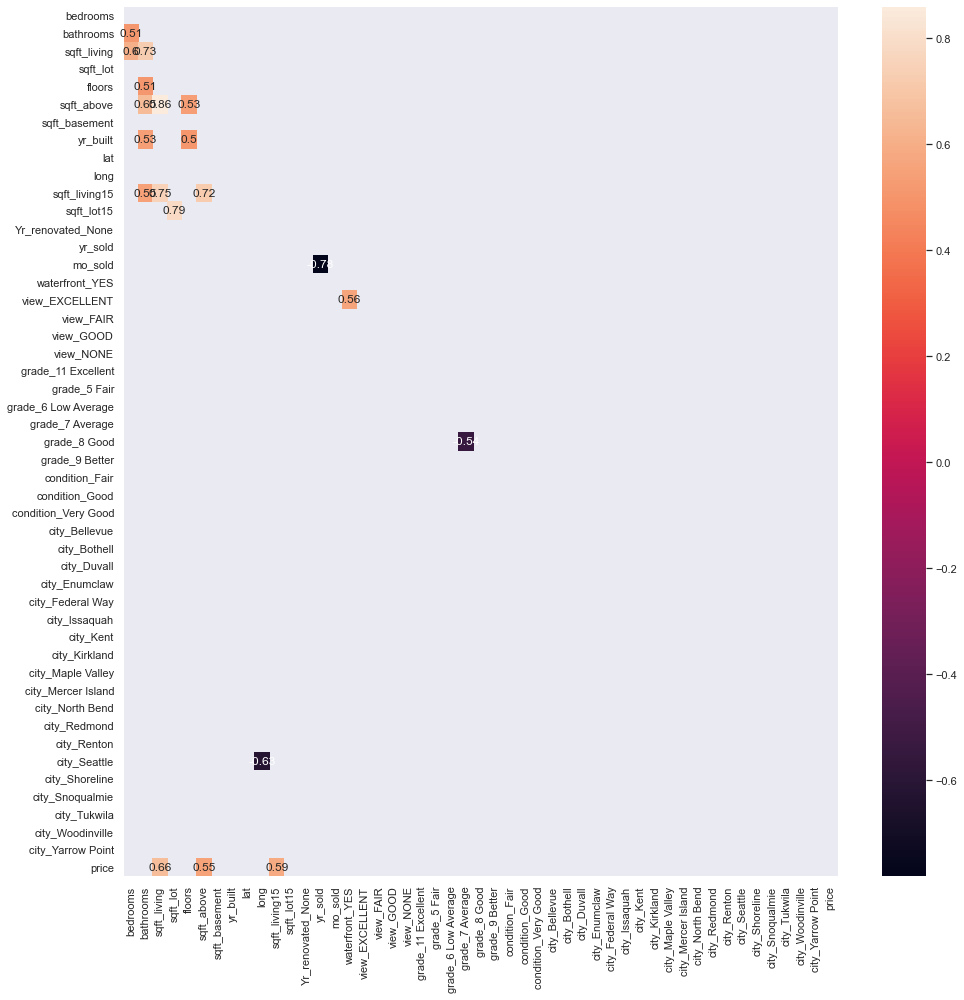

In [111]:
# Use the .heatmap method to illustrate the correlation. 
corr = X_y_train.corr()
trimask = np.triu(np.ones_like(corr, dtype = 'bool'))
sns.set(rc={'figure.figsize':(16, 16)})
sns.heatmap(corr, mask=trimask | (np.abs(corr) <= 0.5), annot=True);

In [112]:
# Let's look at the correlations with 'price'
# (our dependent variable) in particular.

df_corrs = X_y_train.corr()['price'].map(abs).sort_values(ascending=False)
df_corrs

price                  1.000000
sqft_living            0.661800
sqft_living15          0.585301
sqft_above             0.553141
bathrooms              0.487465
lat                    0.382056
grade_7 Average        0.345029
grade_9 Better         0.331765
view_NONE              0.328923
bedrooms               0.314662
grade_11 Excellent     0.295800
sqft_basement          0.292957
floors                 0.271557
city_Yarrow Point      0.254826
grade_6 Low Average    0.247728
view_EXCELLENT         0.211318
city_Mercer Island     0.207572
city_Federal Way       0.200216
view_GOOD              0.200109
city_Kent              0.193024
city_Bellevue          0.165404
city_Tukwila           0.159363
waterfront_YES         0.154839
city_Redmond           0.135103
city_Renton            0.119935
city_Issaquah          0.115745
Yr_renovated_None      0.111017
city_Seattle           0.108735
grade_5 Fair           0.101134
view_FAIR              0.094828
city_Maple Valley      0.094030
sqft_lot

In [113]:
# few visuals to test 

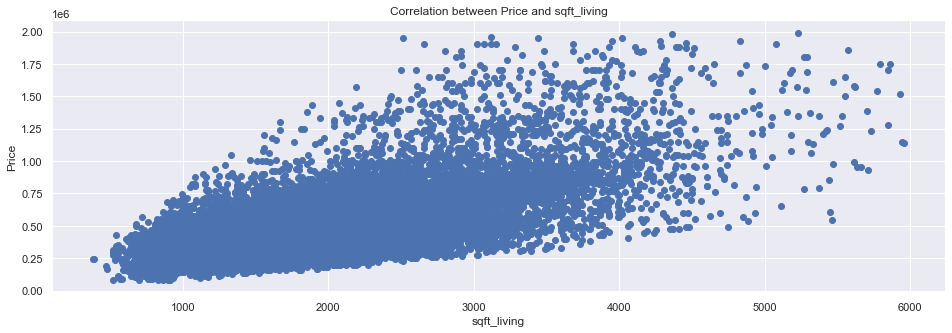

In [114]:
# Correlation between average rating and number of votes 
fig, ax = plt.subplots(figsize=(16, 5))

# Plot data
ax.scatter(x = X_train_preprocessed.sqft_living, y = y_train)

# Customize appearance
ax.tick_params(axis="x", labelrotation=0)
ax.set_xlabel("sqft_living")
ax.set_ylabel("Price")
ax.set_title("Correlation between Price and sqft_living");

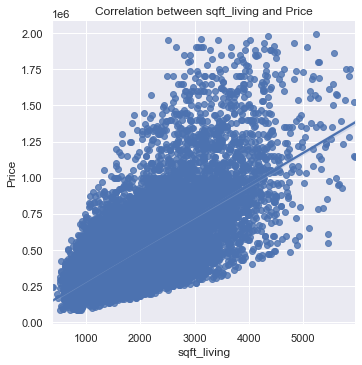

In [115]:
# like that it is showing best fit line. 
ax = sns.lmplot(x='sqft_living', y='price' , data=X_y_train)
ax.set(xlabel='sqft_living', ylabel='Price')
plt.title('Correlation between sqft_living and Price')
plt.savefig('Correlation bw sqft_living and Price.png', bbox_inches='tight');

### 2.6 Multicollinearity

In [116]:
# checking on multicollinearity among predictor variables with VIF and Pearson correlation

In [117]:
# checking multicollinearity with VIF among predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
# the independent variables set
X = sm.add_constant(X_train_preprocessed)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data.sort_values('VIF', ascending = False))

                feature           VIF
0                 const  5.974191e+07
3           sqft_living  1.706709e+02
6            sqft_above  1.451635e+02
7         sqft_basement  4.424875e+01
43         city_Seattle  1.972591e+01
10                 long  1.323957e+01
24      grade_7 Average  1.023924e+01
44       city_Shoreline  7.490003e+00
9                   lat  7.377652e+00
41         city_Redmond  7.040357e+00
25         grade_8 Good  6.793717e+00
37        city_Kirkland  5.361186e+00
23  grade_6 Low Average  5.267554e+00
35        city_Issaquah  4.910876e+00
42          city_Renton  4.405616e+00
30        city_Bellevue  4.359448e+00
31         city_Bothell  3.608432e+00
34     city_Federal Way  3.568624e+00
47     city_Woodinville  3.489652e+00
46         city_Tukwila  3.292521e+00
26       grade_9 Better  3.288788e+00
2             bathrooms  3.205802e+00
11        sqft_living15  3.170500e+00
36            city_Kent  3.138875e+00
45      city_Snoqualmie  2.900060e+00
8           

In [119]:
# correlation matrix
X_train_preprocessed.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Woodinville,city_Yarrow Point
bedrooms,1.000000,0.506822,0.602932,0.064186,0.167229,0.489407,0.288751,0.168608,-0.028864,0.154522,...,0.080464,-0.018425,0.042534,0.054585,-0.194815,-0.024856,0.023207,-0.034143,0.028630,0.045678
bathrooms,0.506822,1.000000,0.727180,0.080140,0.510899,0.652112,0.239988,0.533837,0.010493,0.255936,...,0.070883,0.000779,0.122865,0.013239,-0.182994,-0.090247,0.074161,-0.108745,0.046156,0.039009
sqft_living,0.602932,0.727180,1.000000,0.197573,0.351374,0.859075,0.397946,0.338995,0.039265,0.275121,...,0.112743,-0.002875,0.148216,0.021963,-0.223934,-0.067221,0.075439,-0.092147,0.091327,0.076079
sqft_lot,0.064186,0.080140,0.197573,1.000000,-0.042511,0.193001,0.037600,0.056128,-0.083633,0.281111,...,0.003826,0.108145,0.070483,0.014274,-0.200756,-0.034890,-0.007667,-0.029714,0.158270,-0.000580
floors,0.167229,0.510899,0.351374,-0.042511,1.000000,0.534062,-0.270695,0.501317,0.043054,0.131813,...,-0.011746,0.000998,0.075138,-0.013956,0.029248,-0.085422,0.084999,-0.100110,0.013800,-0.021523
sqft_above,0.489407,0.652112,0.859075,0.193001,0.534062,1.000000,-0.121341,0.449601,-0.018884,0.384762,...,0.079267,0.019784,0.196411,0.054510,-0.304699,-0.086057,0.109558,-0.115171,0.110150,0.058959
sqft_basement,0.288751,0.239988,0.397946,0.037600,-0.270695,-0.121341,1.000000,-0.145535,0.110245,-0.154350,...,0.075934,-0.040145,-0.063495,-0.056085,0.109908,0.025736,-0.050164,0.026921,-0.018718,0.042980
yr_built,0.168608,0.533837,0.338995,0.056128,0.501317,0.449601,-0.145535,1.000000,-0.155359,0.427248,...,-0.003750,0.050607,0.178343,0.084427,-0.409086,-0.075865,0.108179,-0.103968,0.059648,-0.008417
lat,-0.028864,0.010493,0.039265,-0.083633,0.043054,-0.018884,0.110245,-0.155359,1.000000,-0.155660,...,-0.000160,-0.064064,0.197262,-0.170066,0.223103,0.322490,-0.025040,-0.089190,0.201115,0.043809
long,0.154522,0.255936,0.275121,0.281111,0.131813,0.384762,-0.154350,0.427248,-0.155660,1.000000,...,-0.006288,0.346705,0.296095,0.116320,-0.626869,-0.210764,0.315362,-0.102203,0.126192,0.011465


In [120]:
# create variable pairs from the correlation matrix that have correlations over .75

X_train_pairs=X_train_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
X_train_pairs['pairs'] = list(zip(X_train_pairs.level_0, X_train_pairs.level_1))

# set index to pairs
X_train_pairs.set_index(['pairs'], inplace = True)

#d rop level columns
X_train_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
X_train_pairs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
X_train_pairs.drop_duplicates(inplace=True)

In [121]:
# correlation pairs
X_train_pairs[(X_train_pairs.cc>.75) & (X_train_pairs.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.859075
"(sqft_lot15, sqft_lot)",0.787113
"(yr_sold, mo_sold)",0.781163
"(sqft_living15, sqft_living)",0.754187


In [122]:
# Looks like we can drop yr_renovated, sqft_above, condition_Average, yr_sold or mo_sold, 
# bathrooms, and sqft_living15

### 2.6.1 Recursive Feature Elimination in Scikit-Learn

In [123]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=3)

In [124]:
ss = StandardScaler()
ss.fit(X_train_preprocessed)

X_train_scaled = ss.transform(X_train_preprocessed)

In [125]:
select.fit(X=X_train_scaled, y=y_train)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [126]:
select.support_

array([False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [127]:
select.ranking_

array([30, 14,  1, 36, 38, 17, 18,  4,  1, 40, 11, 37, 32, 24, 39, 12, 22,
       45, 26,  9, 23,  6,  3,  1,  2,  5, 41, 29, 21, 13, 16, 20, 27, 42,
       43, 35, 33, 46, 10, 44, 31, 28,  8, 15, 34, 25, 19,  7])

In [128]:
X_train_preprocessed.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Yr_renovated_None', 'yr_sold',
       'mo_sold', 'waterfront_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
       'view_NONE', 'grade_11 Excellent', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good',
       'condition_Very Good', 'city_Bellevue', 'city_Bothell', 'city_Duvall',
       'city_Enumclaw', 'city_Federal Way', 'city_Issaquah', 'city_Kent',
       'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
       'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
       'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
       'city_Yarrow Point'],
      dtype='object')

In [129]:
df_ranking = pd.DataFrame(select.ranking_, X_train_preprocessed.columns) 
df_ranking.columns = ['Ranking']
df_ranking.sort_values('Ranking', ascending = True)

,Ranking
grade_7 Average,1
sqft_living,1
lat,1
grade_8 Good,2
grade_6 Low Average,3
yr_built,4
grade_9 Better,5
grade_5 Fair,6
city_Yarrow Point,7
city_Seattle,8


Three main Features according to Recurrsive Feature Elimination are 'sqft_living', 'lat', 'grade_7 Average'


In [130]:
# Multicollinearity among 'sqft_living', 'lat', 'waterfront_YES'. 

Preds = X_train_preprocessed[['sqft_living', 'lat', 'grade_7 Average']]
target = y_train

In [131]:
#lr = LinearRegression()
lr_rfe.fit(Preds, target)

LinearRegression()

In [132]:
lr_rfe.score(Preds, target)

0.5760758489380908

In [133]:
Preds.corr()

,sqft_living,lat,grade_7 Average
sqft_living,1.000000,0.039265,-0.361624
lat,0.039265,1.000000,-0.035055
grade_7 Average,-0.361624,-0.035055,1.000000


### 2.6.2 Stepwise selection with p-values

In [134]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            worst_feature_name = included[worst_feature]
            included.pop(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature_name, worst_pval))
        if not changed:
            break
    return included

In [135]:
result = stepwise_selection(X_train_preprocessed, y_train, verbose=True)
print('resulting features:')
print(result)

Add  grade_7 Average                with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  lat                            with p-value 0.0
Add  city_Yarrow Point              with p-value 2.94613e-302
Add  city_Seattle                   with p-value 0.0
Add  sqft_living15                  with p-value 2.08349e-236
Add  city_Mercer Island             with p-value 8.93474e-204
Add  view_NONE                      with p-value 4.3268e-173
Add  city_Bellevue                  with p-value 7.56286e-136
Add  waterfront_YES                 with p-value 4.87428e-119
Add  grade_8 Good                   with p-value 2.95671e-65
Add  grade_6 Low Average            with p-value 4.18137e-186
Add  grade_11 Excellent             with p-value 1.83229e-62
Add  condition_Very Good            with p-value 6.54579e-64
Add  grade_5 Fair                   with p-value 4.48945e-63
Add  grade_9 Better                 with p-value 8.04781e-82
Add  yr_built                       with p-value 1

## 3. Transformaltion and Feature Engineering

##### Lat and long multiple var

In [136]:
# create a new column of multiplication between 'lat' and 'long'
X_train_preprocessed['coordinates'] = X_train_preprocessed['lat']*X_train_preprocessed['long']

##### Log transformation on features

In [137]:
X_train_prep_log = X_train_preprocessed.copy()
X_train_prep_log['sqft_living'] = X_train_prep_log['sqft_living'].map(lambda x: np.log(x))
X_train_prep_log.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Woodinville,city_Yarrow Point,coordinates
14138,3,3.00,8.191463,17483,2.0,3610,0.0,1954,47.4852,-122.357,...,0,0,0,1,0,0,0,0,0,-5810.146616
16113,4,1.75,7.832014,15205,1.0,2040,480.0,1954,47.7642,-122.264,...,0,0,0,0,0,0,0,0,0,-5839.842149
10703,5,1.75,7.580700,3748,1.0,980,980.0,1965,47.7027,-122.349,...,0,0,0,0,1,0,0,0,0,-5836.377642
12213,5,3.25,8.253228,4800,3.0,2750,1090.0,2008,47.5929,-122.290,...,0,0,0,1,0,0,0,0,0,-5820.135741
6352,4,1.50,7.455877,7700,1.0,1010,720.0,1963,47.4996,-122.163,...,0,0,1,0,0,0,0,0,0,-5802.693635


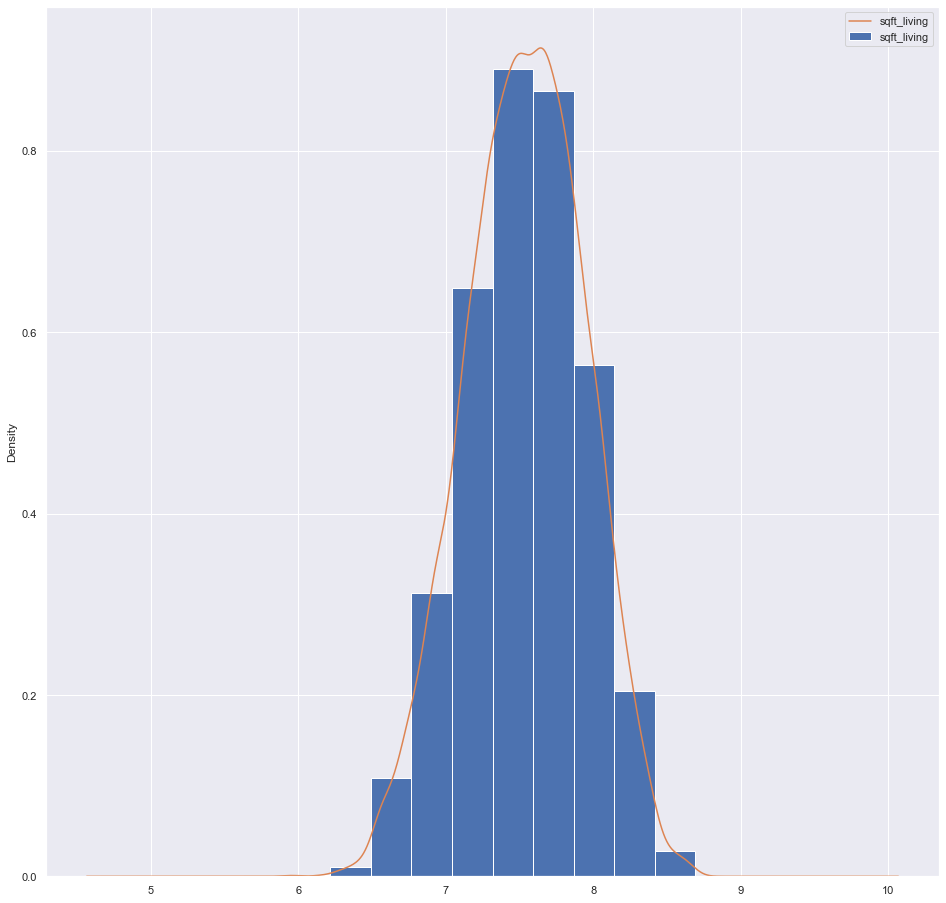

In [138]:
X_train_prep_log['sqft_living'].plot.hist(density=True)
X_train_prep_log.sqft_living.plot.kde()
plt.legend()
plt.show()

In [139]:
# Log transformation of 'sqft_living' on X_train_preprocessed_2

In [140]:
X_train_prep_2_log = X_train_preprocessed_2.copy()
X_train_prep_2_log['sqft_living'] = X_train_prep_2_log['sqft_living'].map(lambda x: np.log(x))
X_train_prep_2_log.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,mo_sold_3,mo_sold_4,mo_sold_5,mo_sold_6,mo_sold_7,mo_sold_8,mo_sold_9,mo_sold_10,mo_sold_11,mo_sold_12
14138,2015-04-22,3,3.00,8.191463,17483,2.0,3610,0.0,1954,0.0,...,0,1,0,0,0,0,0,0,0,0
16113,2014-12-15,4,1.75,7.832014,15205,1.0,2040,480.0,1954,0.0,...,0,0,0,0,0,0,0,0,0,1
10703,2014-08-19,5,1.75,7.580700,3748,1.0,980,980.0,1965,0.0,...,0,0,0,0,0,1,0,0,0,0
12213,2014-06-20,5,3.25,8.253228,4800,3.0,2750,1090.0,2008,0.0,...,0,0,0,1,0,0,0,0,0,0
6352,2015-01-05,4,1.50,7.455877,7700,1.0,1010,720.0,1963,0.0,...,0,0,0,0,0,0,0,0,0,0


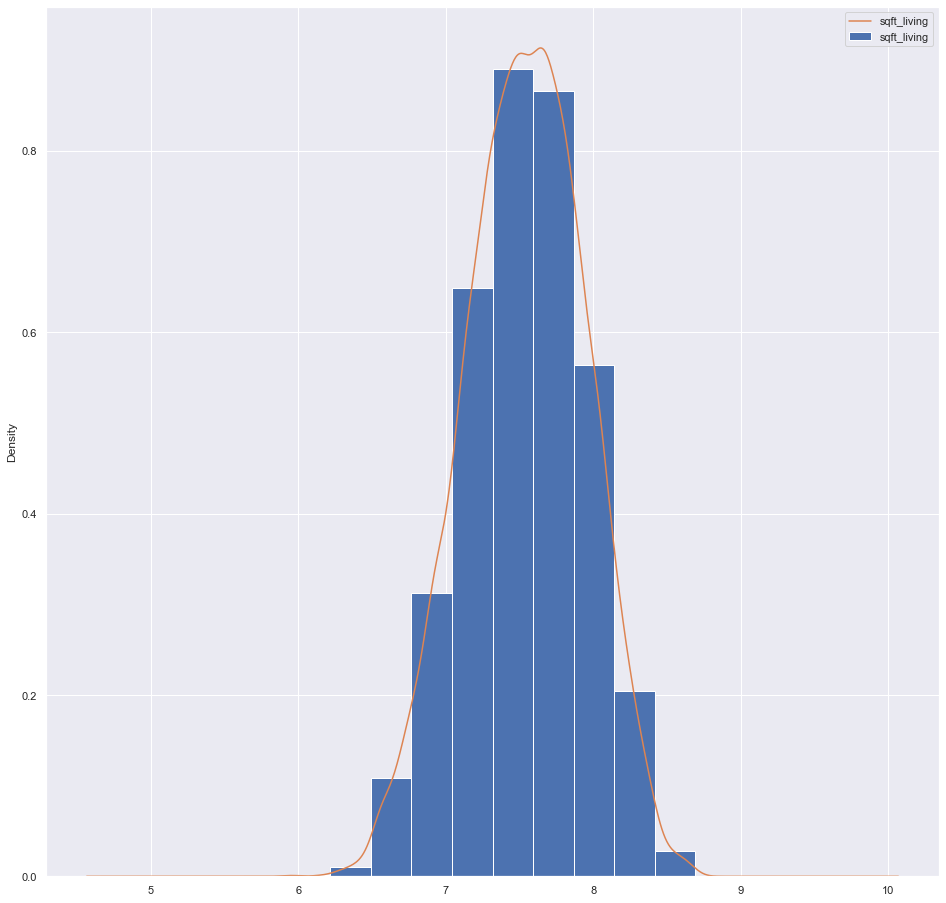

In [141]:
X_train_prep_2_log['sqft_living'].plot.hist(density=True)
X_train_prep_2_log.sqft_living.plot.kde()
plt.legend()
plt.show()

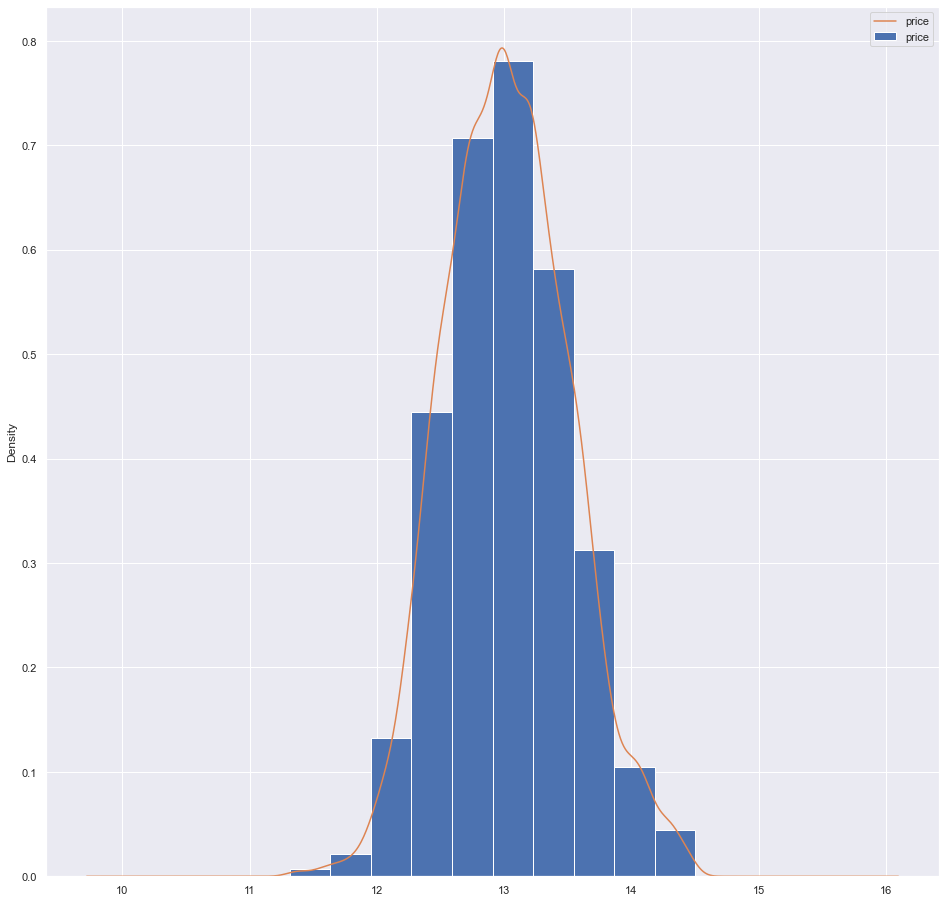

In [142]:
# Log transformaltion of target data
y_train_log = np.log(y_train)

y_train_log.plot.hist(density=True)
y_train_log.plot.kde()
plt.legend()
plt.show()

## 4. Data Modeling

### Base_Model

In [143]:
# Model based on Recursive Feature Elimination

In [144]:
features = ['sqft_living', 'lat', 'waterfront_YES']

In [145]:
model_data = X_train_preprocessed.loc[:, features]

In [146]:
predictors = sm.add_constant(model_data)
base_model = sm.OLS(y_train, predictors).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     7202.
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:56:53   Log-Likelihood:            -2.0956e+05
No. Observations:               15513   AIC:                         4.191e+05
Df Residuals:                   15509   BIC:                         4.192e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.367e+07   4.89e+05    -68.803      0.000   -3.46e+07   -3.27e+07
sqft_living      214.7187      1.738    123.513      0.000     211.311     218.126
lat             7.095e+05   1.03e+04     68.939      0.000    6.89e+05     7.3e+05
waterfront_YES  6.025e+05   2.39e+04     25.258      0.000    5.56e+05    6.49e+05
==============================================================================
Omnibus:                     4684.203   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20453.248
Skew:                           1.423   Prob(JB):                         0.00
Kurtosis:                       7.852   Cond. No.                     7.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Checking on Multicollinearity with VIF

In [147]:
# the independent variables set
X = model_data
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values('VIF', ascending = False, ignore_index=False)

,feature,VIF
0,sqft_living,7.094558
1,lat,7.083796
2,waterfront_YES,1.005423


### Model_2

In [148]:
# Model_2 based on Stepwise selection with p-values

In [149]:
X_train_preprocessed.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Yr_renovated_None', 'yr_sold',
       'mo_sold', 'waterfront_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
       'view_NONE', 'grade_11 Excellent', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good',
       'condition_Very Good', 'city_Bellevue', 'city_Bothell', 'city_Duvall',
       'city_Enumclaw', 'city_Federal Way', 'city_Issaquah', 'city_Kent',
       'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
       'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
       'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
       'city_Yarrow Point', 'coordinates'],
      dtype='object')

In [150]:
features_2 = ['sqft_above', 'lat', 'sqft_basement', 'view_EXCELLENT', 'grade_11 Excellent', 
              'view_NONE', 'waterfront_YES', 'sqft_living15', 'condition_Very Good', 
              'yr_built', 'bathrooms', 'bedrooms', 'grade_9 Better', 'yr_sold', 'view_GOOD',
              'grade_7 Average', 'grade_6 Low Average', 'grade_8 Good', 'grade_5 Fair', 'condition_Good', 
              'Yr_renovated_None', 'mo_sold', 'sqft_living', 'sqft_lot', 
              'city_Bellevue', 'city_Bothell', 'city_Duvall',
              'city_Enumclaw', 'city_Federal Way', 'city_Issaquah', 'city_Kent',
              'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
              'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
              'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
              'city_Yarrow Point', 'coordinates']

In [151]:
model_data_2 = X_train_preprocessed.loc[:, features_2]

In [152]:
predictors = sm.add_constant(model_data_2)
model_2 = sm.OLS(y_train, predictors).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1432.
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:56:53   Log-Likelihood:            -2.0373e+05
No. Observations:               15513   AIC:                         4.075e+05
Df Residuals:                   15468   BIC:                         4.079e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.051e+08   6.89e+06    -15.251      0.000   -1.19e+08   -9.16e+07
sqft_above             69.5290     15.502      4.485      0.000      39.142      99.916
lat                  7.408e+05   7.08e+04     10.464      0.000    6.02e+05     8.8e+05
sqft_basement          42.8536     15.572      2.752      0.006      12.331      73.376
view_EXCELLENT       1.559e+05   1.25e+04     12.428      0.000    1.31e+05    1.81e+05
grade_11 Excellent   1.138e+05   9781.553     11.630      0.000    9.46e+04    1.33e+05
view_NONE           -7.169e+04   4565.668    -15.701      0.000   -8.06e+04   -6.27e+04
waterfront_YES       3.361e+05   1.98e+04     16.942      0.000    2.97e+05    3.75e+05
sqft_living15          34.8072      2.677     13.001      0.000      29.559      40.055
condition_Very Good  6.961e+04   4000.291     17.400      0.000    6.18e+04    7.74e+04
yr_built            -1020.1995     54.787    -18.621      0.000   -1127.587    -912.811
bathrooms            2.913e+04   2370.591     12.287      0.000    2.45e+04    3.38e+04
bedrooms            -9318.6654   1522.792     -6.119      0.000   -1.23e+04   -6333.814
grade_9 Better      -1.016e+05   5455.633    -18.624      0.000   -1.12e+05   -9.09e+04
yr_sold              3.334e+04   3386.292      9.845      0.000    2.67e+04       4e+04
view_GOOD            7.138e+04   7909.997      9.024      0.000    5.59e+04    8.69e+04
grade_7 Average     -2.599e+05   6362.900    -40.843      0.000   -2.72e+05   -2.47e+05
grade_6 Low Average -2.991e+05   7701.121    -38.840      0.000   -3.14e+05   -2.84e+05
grade_8 Good        -2.064e+05   5658.696    -36.483      0.000   -2.18e+05   -1.95e+05
grade_5 Fair         -3.04e+05    1.2e+04    -25.279      0.000   -3.28e+05    -2.8e+05
condition_Good       2.457e+04   2553.204      9.622      0.000    1.96e+04    2.96e+04
Yr_renovated_None   -4.441e+04   5823.824     -7.626      0.000   -5.58e+04    -3.3e+04
mo_sold              1223.4754    509.604      2.401      0.016     224.593    2222.358
sqft_living            46.2253     15.557      2.971      0.003      15.732      76.718
sqft_lot                0.2077      0.045      4.575      0.000       0.119       0.297
city_Bellevue        2.567e+04   9338.454      2.749      0.006    7366.886     4.4e+04
city_Bothell        -2.413e+05   1.23e+04    -19.647      0.000   -2.65e+05   -2.17e+05
city_Duvall         -2.433e+05   1.58e+04    -15.360      0.000   -2.74e+05   -2.12e+05
city_Enumclaw         9.08e+04   1.24e+04      7.333      0.000    6.65e+04    1.15e+05
city_Federal Way    -1.177e+04   8141.081     -1.446      0.148   -2.77e+04    4184.309
city_Issaquah       -1.221e+04   9850.875     -1.239      0.215   -3.15e+04    7099.118
city_Kent            -4.08e+04   7448.848     -5.478      0.000   -5.54e+04   -2.62e+04
cit

##### Checking on multicollinearity with VIF

In [153]:
# the independent variables set
X = model_data_2
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values('VIF', ascending = False, ignore_index=False)

,feature,VIF
1,lat,1.171290e+07
43,coordinates,1.076232e+07
13,yr_sold,8.618658e+05
9,yr_built,1.204835e+04
22,sqft_living,1.202266e+03
0,sqft_above,9.026548e+02
2,sqft_basement,6.433888e+01
20,Yr_renovated_None,3.389541e+01
7,sqft_living15,3.161332e+01
37,city_Seattle,2.921388e+01


### Model_3

In [154]:
features_3 = ['grade_11 Excellent', 
              'waterfront_YES', 'condition_Very Good', 
              'grade_9 Better', 
              'grade_7 Average', 'grade_6 Low Average', 'grade_8 Good', 'grade_5 Fair', 'condition_Good', 
              'mo_sold', 'sqft_living', 
              'city_Bellevue', 'city_Bothell', 'city_Duvall',
              'city_Enumclaw', 'city_Issaquah', 'city_Kent',
              'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
              'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
              'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
              'city_Yarrow Point']

In [155]:
model_data_3 = X_train_preprocessed.loc[:, features_3]

In [156]:
predictors_3 = sm.add_constant(model_data_3)
model_3 = sm.OLS(y_train, predictors_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1593.
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:56:56   Log-Likelihood:            -2.0560e+05
No. Observations:               15513   AIC:                         4.113e+05
Df Residuals:                   15483   BIC:                         4.115e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.886e+05   9764.907     29.555      0.000    2.69e+05    3.08e+05
grade_11 Excellent   1.365e+05    1.1e+04     12.463      0.000    1.15e+05    1.58e+05
waterfront_YES       5.253e+05   1.85e+04     28.339      0.000    4.89e+05    5.62e+05
condition_Very Good  9.256e+04   4245.594     21.801      0.000    8.42e+04    1.01e+05
grade_9 Better      -1.168e+05   6076.023    -19.219      0.000   -1.29e+05   -1.05e+05
grade_7 Average     -2.998e+05   6536.720    -45.864      0.000   -3.13e+05   -2.87e+05
grade_6 Low Average -3.496e+05   7873.862    -44.399      0.000   -3.65e+05   -3.34e+05
grade_8 Good        -2.355e+05   6054.130    -38.904      0.000   -2.47e+05   -2.24e+05
grade_5 Fair        -3.235e+05    1.3e+04    -24.979      0.000   -3.49e+05   -2.98e+05
condition_Good        3.54e+04   2675.206     13.234      0.000    3.02e+04    4.06e+04
mo_sold             -2543.3907    358.391     -7.097      0.000   -3245.878   -1840.903
sqft_living           133.0465      2.050     64.887      0.000     129.027     137.066
city_Bellevue        2.786e+05   6384.427     43.640      0.000    2.66e+05    2.91e+05
city_Bothell         1.493e+05   8240.750     18.121      0.000    1.33e+05    1.65e+05
city_Duvall          1.191e+05   1.23e+04      9.664      0.000     9.5e+04    1.43e+05
city_Enumclaw        3.868e+04   1.13e+04      3.414      0.001    1.65e+04    6.09e+04
city_Issaquah        1.945e+05   6366.748     30.543      0.000    1.82e+05    2.07e+05
city_Kent            1.591e+04   6037.827      2.636      0.008    4078.091    2.77e+04
city_Kirkland        2.765e+05   6422.130     43.047      0.000    2.64e+05    2.89e+05
city_Maple Valley    5.122e+04   7647.612      6.698      0.000    3.62e+04    6.62e+04
city_Mercer Island   4.862e+05   1.12e+04     43.552      0.000    4.64e+05    5.08e+05
city_North Bend      1.268e+05   1.15e+04     11.017      0.000    1.04e+05    1.49e+05
city_Redmond         2.225e+05   5876.942     37.866      0.000    2.11e+05    2.34e+05
city_Renton          7.589e+04   5619.938     13.504      0.000    6.49e+04    8.69e+04
city_Seattle         2.926e+05   4370.864     66.954      0.000    2.84e+05    3.01e+05
city_Shoreline       1.843e+05   6096.615     30.233      0.000    1.72e+05    1.96e+05
city_Snoqualmie      1.275e+05   1.01e+04     12.595      0.000    1.08e+05    1.47e+05
city_Tukwila         8.933e+04   6844.969     13.051      0.000    7.59e+04    1.03e+05
city_Woodinville     1.595e+05   8548.413     18.656      0.000    1.43e+05    1.76e+05
city_Yarrow Point    6.636e+05   1.06e+04     62.831      0.000    6.43e+05    6.84e+05
==============================================================================
Omnibus:                     4289.876   Durbin-Watson:                   2.023
Prob(Omnibus):       

##### Checking on multicollinearity with VIF

In [157]:
# the independent variables set
X = model_data_3
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values('VIF', ascending = False, ignore_index=False)

,feature,VIF
10,sqft_living,8.204005
9,mo_sold,5.199436
4,grade_7 Average,5.134432
23,city_Seattle,4.275504
6,grade_8 Good,3.826950
3,grade_9 Better,2.452568
5,grade_6 Low Average,2.014497
22,city_Renton,1.807873
21,city_Redmond,1.715541
16,city_Kent,1.605750


##### Checking on normality of feature data

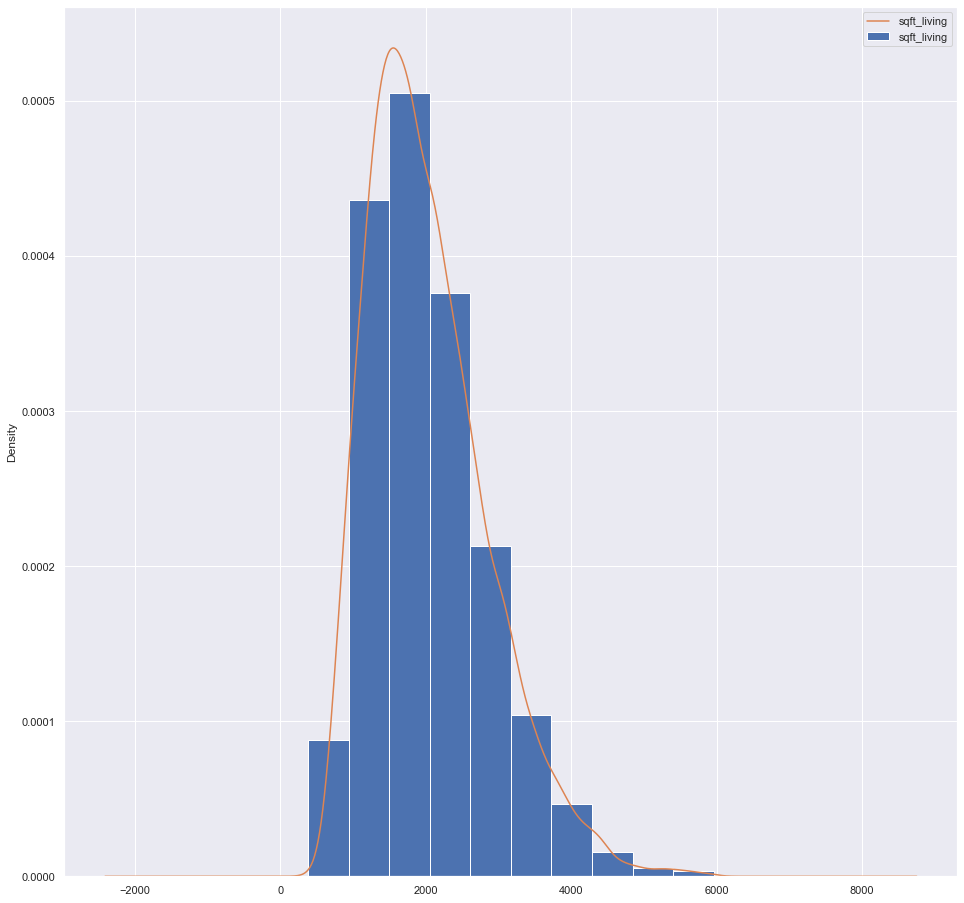

In [158]:
model_data_3.sqft_living.plot.hist(density=True)
model_data_3.sqft_living.plot.kde()
plt.legend()
plt.show()

sqft_living data is skewed left. 

##### Check on linearity assumption

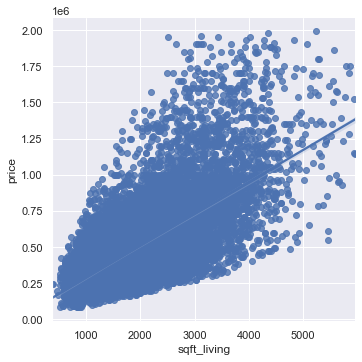

In [159]:
sns.lmplot(x='sqft_living', y='price', data=X_y_train);

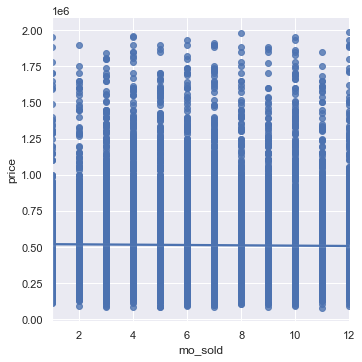

In [160]:
sns.lmplot(x='mo_sold', y='price', data=X_y_train);

'sqft_liivng' and price do meet linearity assumption. \
'mo_sold'(month sold) looks like categorical variable and can be broken to dummies.   

##### Checking on normality of residuals

<AxesSubplot:ylabel='Count'>

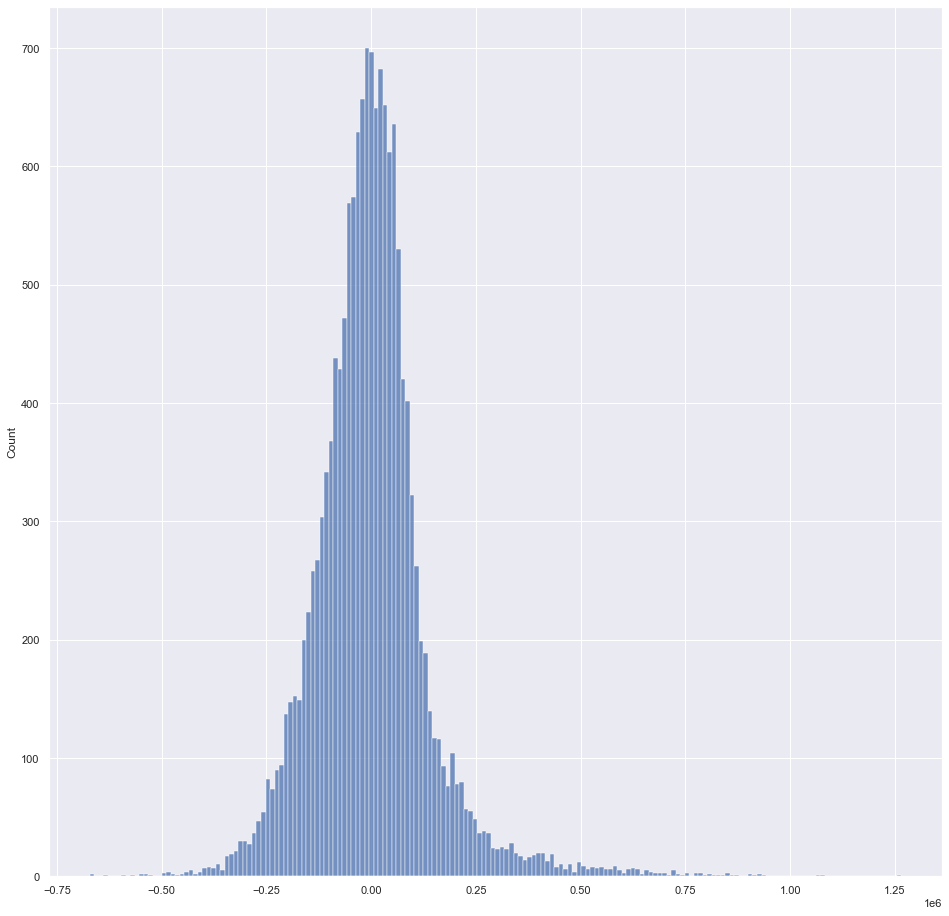

In [161]:
sns.histplot(model_3.resid)

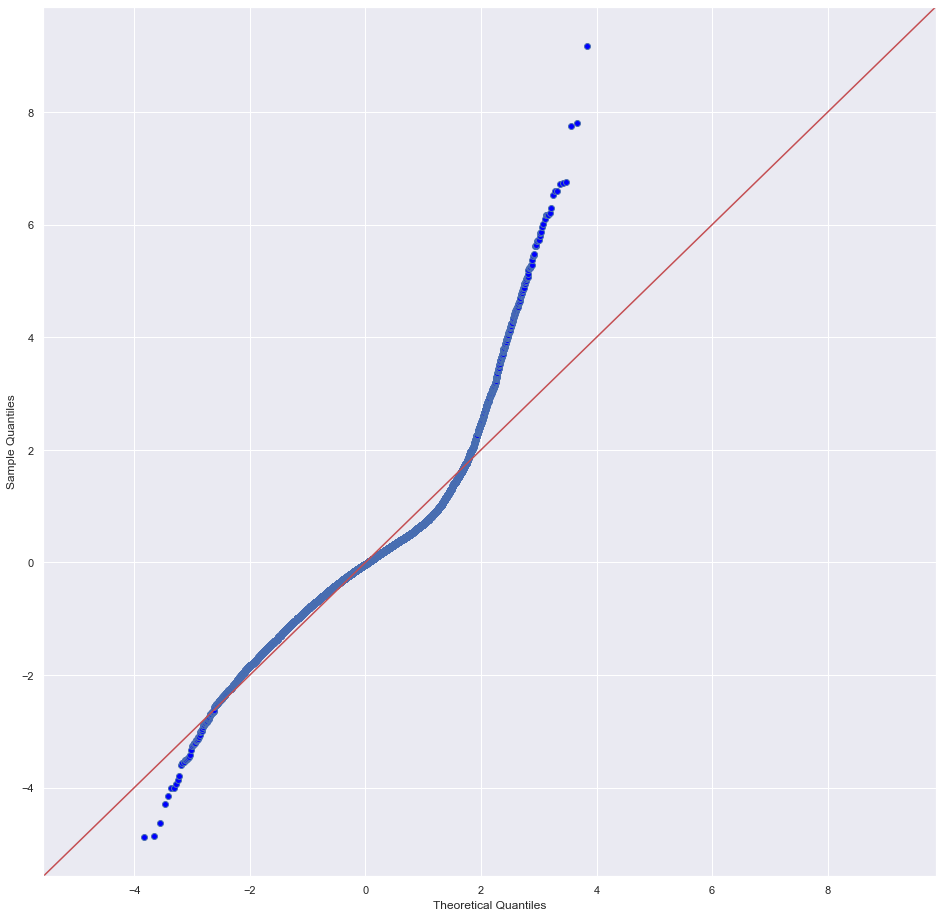

In [162]:
#checking in normality assumption for residuals

import scipy.stats as stats
residuals = model_3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Residuals are not normally distributed. It looks like the residuals histogram is too peaked in the middle.  

##### Homoskedasticity

Durbin-Watson score (the test for error homoskedasticity) is within the normal range (2.023). 

In [163]:
#plt.scatter(x=fitted.fittedvalues,y=fitted.resid)

### Model_3_log (with log transformation)

In [164]:
# We will rerun model_3 with log transformed 'sqft_living'

In [165]:
model_data_3_log = X_train_prep_log.loc[:, features_3]

In [166]:
predictors_3_log = sm.add_constant(model_data_3_log)
model_3_log = sm.OLS(y_train_log, predictors_3_log).fit()
model_3_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1808.
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:57:03   Log-Likelihood:                 509.23
No. Observations:               15513   AIC:                            -958.5
Df Residuals:                   15483   BIC:                            -729.0
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.2799      0.057    162.557      0.000       9.168       9.392
grade_11 Excellent      0.1382      0.018      7.481      0.000       0.102       0.174
waterfront_YES          0.5945      0.031     18.893      0.000       0.533       0.656
condition_Very Good     0.1563      0.007     21.683      0.000       0.142       0.170
grade_9 Better         -0.1219      0.010    -11.941      0.000      -0.142      -0.102
grade_7 Average        -0.4468      0.011    -42.161      0.000      -0.468      -0.426
grade_6 Low Average    -0.5910      0.013    -44.749      0.000      -0.617      -0.565
grade_8 Good           -0.3029      0.010    -30.645      0.000      -0.322      -0.283
grade_5 Fair           -0.6156      0.022    -27.803      0.000      -0.659      -0.572
condition_Good          0.0663      0.005     14.586      0.000       0.057       0.075
mo_sold                -0.0049      0.001     -8.108      0.000      -0.006      -0.004
sqft_living             0.4816      0.007     69.841      0.000       0.468       0.495
city_Bellevue           0.6506      0.011     60.034      0.000       0.629       0.672
city_Bothell            0.4369      0.014     31.231      0.000       0.409       0.464
city_Duvall             0.3640      0.021     17.394      0.000       0.323       0.405
city_Enumclaw           0.1030      0.019      5.353      0.000       0.065       0.141
city_Issaquah           0.5403      0.011     49.991      0.000       0.519       0.561
city_Kent               0.0535      0.010      5.220      0.000       0.033       0.074
city_Kirkland           0.6419      0.011     58.881      0.000       0.621       0.663
city_Maple Valley       0.1791      0.013     13.792      0.000       0.154       0.204
city_Mercer Island      0.8711      0.019     45.980      0.000       0.834       0.908
city_North Bend         0.3670      0.020     18.791      0.000       0.329       0.405
city_Redmond            0.5849      0.010     58.634      0.000       0.565       0.604
city_Renton             0.2495      0.010     26.157      0.000       0.231       0.268
city_Seattle            0.6608      0.007     88.908      0.000       0.646       0.675
city_Shoreline          0.4783      0.010     46.197      0.000       0.458       0.499
city_Snoqualmie         0.4278      0.017     24.914      0.000       0.394       0.461
city_Tukwila            0.1941      0.012     16.704      0.000       0.171       0.217
city_Woodinville        0.4837      0.015     33.337      0.000       0.455       0.512
city_Yarrow Point       1.0817      0.018     60.341      0.000       1.047       1.117
==============================================================================
Omnibus:                      952.124   Durbin-Watson:                   2.019
Prob(Omnibus):       

##### Checking on Multicollinearity with VIF

In [167]:
# the independent variables set
X = model_data_3_log
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values('VIF', ascending = False, ignore_index=False)

,feature,VIF
10,sqft_living,32.209665
4,grade_7 Average,8.883269
6,grade_8 Good,6.362456
9,mo_sold,5.487879
23,city_Seattle,4.946448
3,grade_9 Better,3.347216
5,grade_6 Low Average,2.731625
22,city_Renton,1.934093
21,city_Redmond,1.875454
16,city_Kent,1.704395


##### Checking on normality of feature data

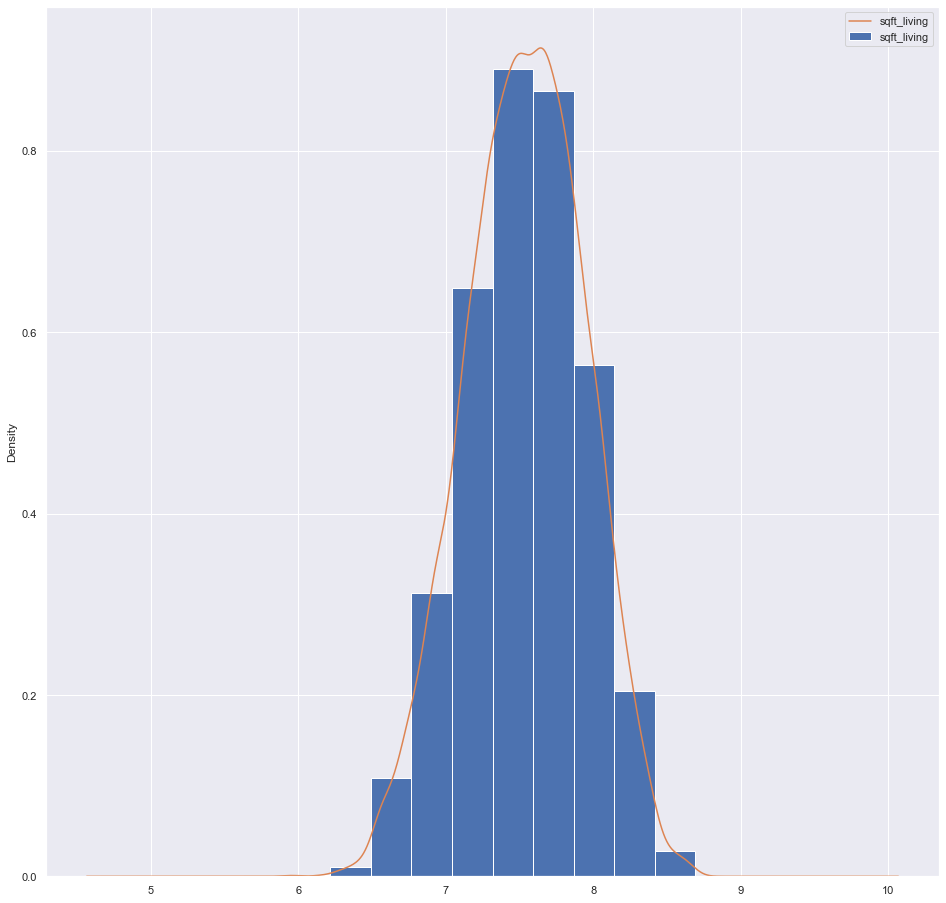

In [168]:
model_data_3_log.sqft_living.plot.hist(density=True)
model_data_3_log.sqft_living.plot.kde()
plt.legend()
plt.show();

##### Checking on linearity assumption

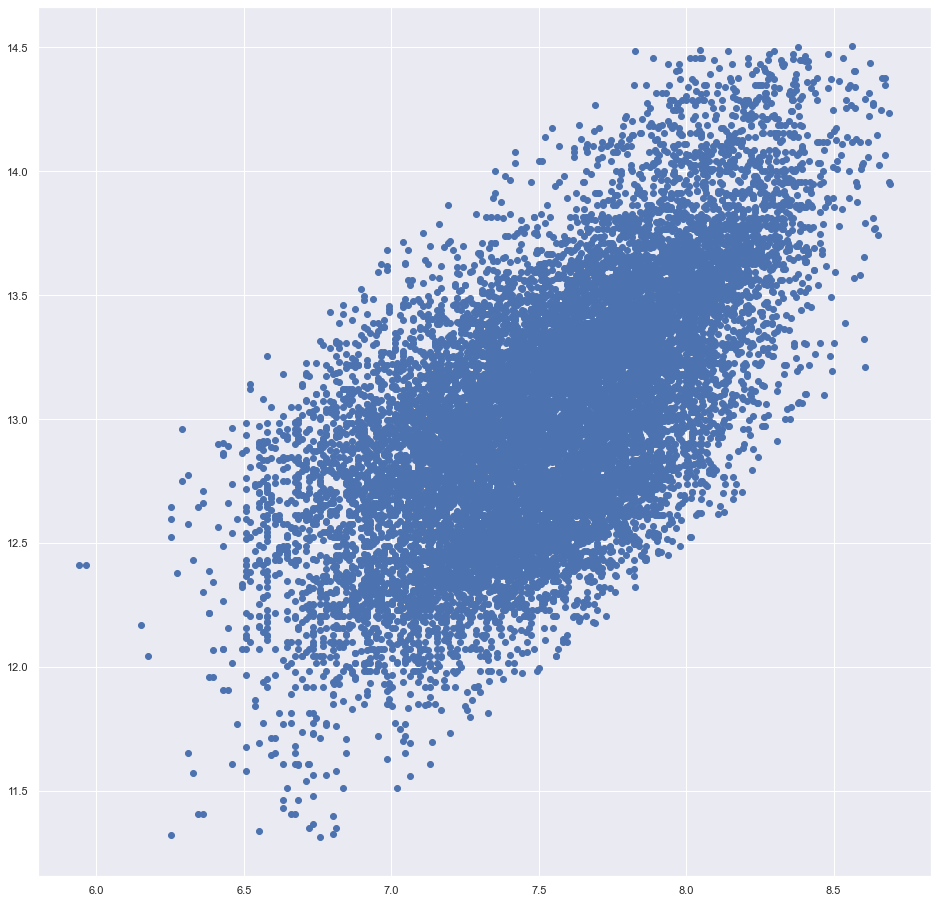

In [169]:
plt.scatter(x = X_train_prep_log.sqft_living, y = y_train_log)
plt.show()

##### Checking on Normality of residuals

<AxesSubplot:ylabel='Count'>

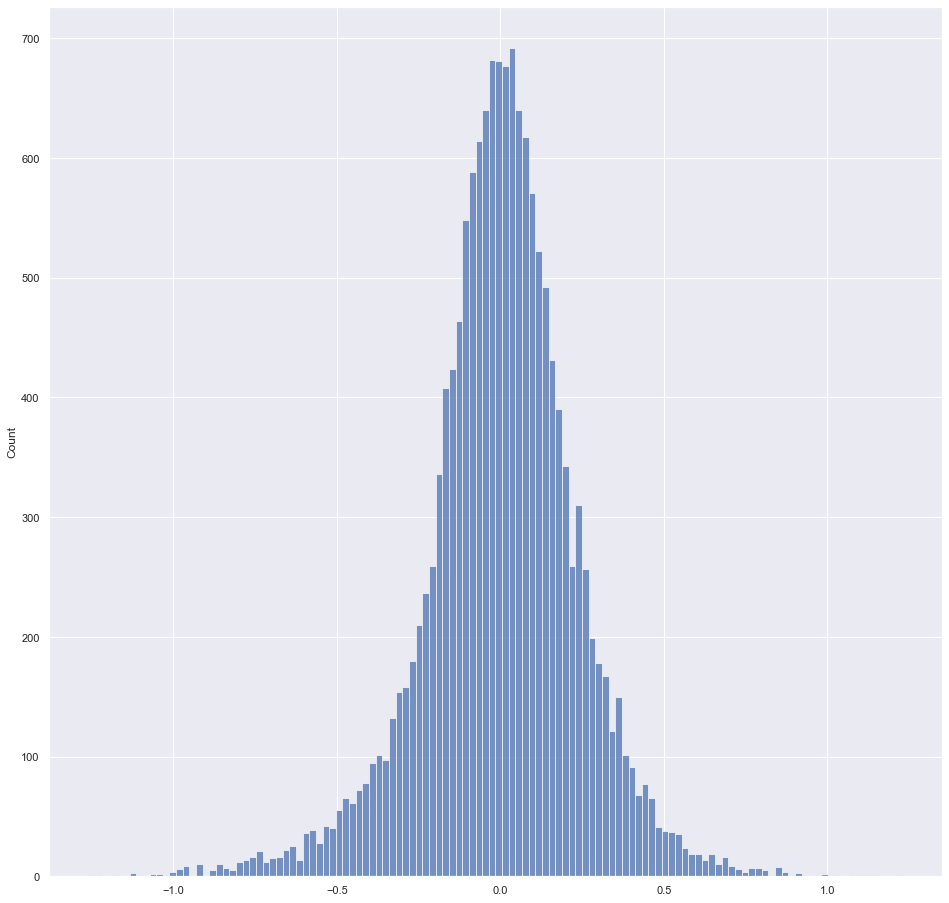

In [170]:
sns.histplot(model_3_log.resid)

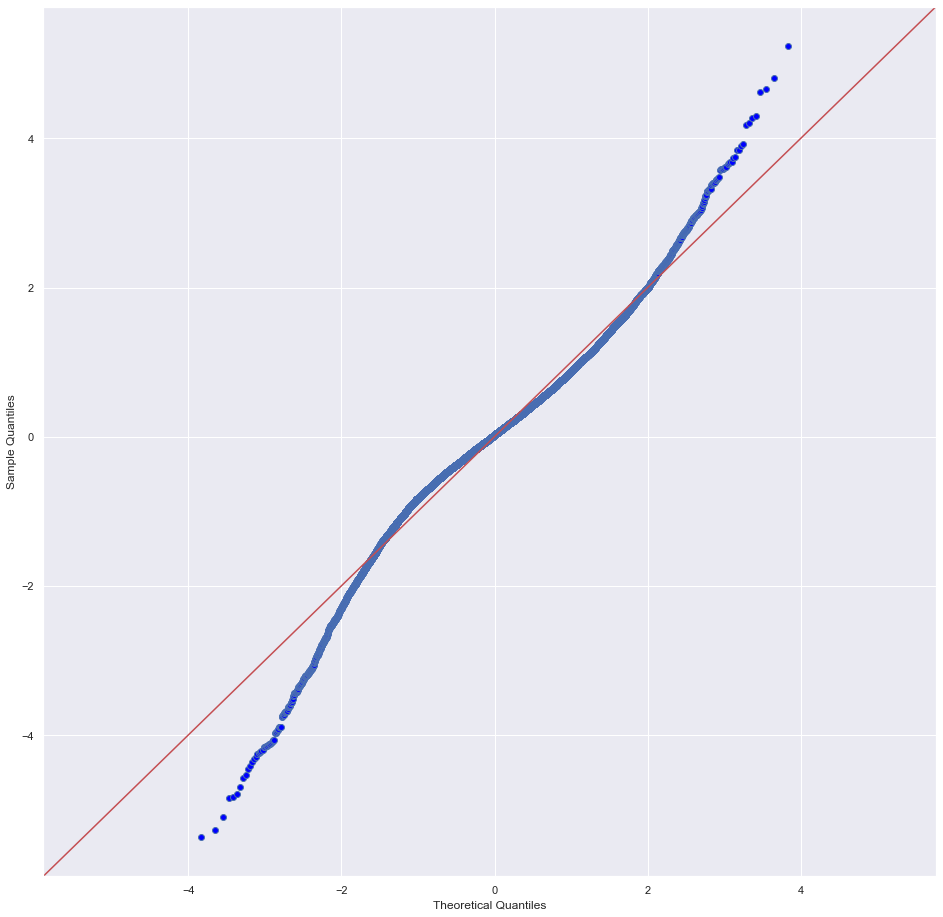

In [171]:
#checking in normality assumption for residuals

residuals = model_3_log.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

##### Homoskedasticity

Durbin-Watson score (the test for error homoskedasticity) is within the normal range (2.019). 

In [172]:
#plt.scatter(x=fitted.fittedvalues,y=fitted.resid)

### Model_4

In [173]:
# Model_3 with 'yr_sold' and 'mo_sold' as categoricals

In [174]:
X_train_preprocessed_2.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Yr_renovated_None',
       'waterfront_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
       'view_NONE', 'grade_11 Excellent', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Fair', 'condition_Good',
       'condition_Very Good', 'city_Bellevue', 'city_Bothell', 'city_Duvall',
       'city_Enumclaw', 'city_Federal Way', 'city_Issaquah', 'city_Kent',
       'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
       'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
       'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
       'city_Yarrow Point', 'yr_sold_2015', 'mo_sold_2', 'mo_sold_3',
       'mo_sold_4', 'mo_sold_5', 'mo_sold_6', 'mo_sold_7', 'mo_sold_8',
     

In [175]:
features_4 = ['sqft_living',  'waterfront_YES', 'yr_sold_2015',
              'condition_Fair', 'condition_Good', 'condition_Very Good', 
              'grade_9 Better', 'grade_11 Excellent',
              'grade_7 Average', 'grade_6 Low Average', 'grade_8 Good', 'grade_5 Fair',  
              'mo_sold_3', 'mo_sold_4', 'mo_sold_5', 'mo_sold_6', 'mo_sold_7', 'mo_sold_8',
              'mo_sold_9', 'mo_sold_10', 'mo_sold_11', 'mo_sold_12',
              'city_Bellevue', 'city_Bothell', 'city_Duvall',
              'city_Enumclaw', 'city_Issaquah', 'city_Kent',
              'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
              'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
              'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
              'city_Yarrow Point']

In [176]:
model_data_4 = X_train_preprocessed_2.loc[:, features_4]

In [177]:
predictors_4 = sm.add_constant(model_data_4)
model_4 = sm.OLS(y_train, predictors_4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1167.
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:57:06   Log-Likelihood:            -2.0554e+05
No. Observations:               15513   AIC:                         4.112e+05
Df Residuals:                   15472   BIC:                         4.115e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.323e+05   1.25e+04     18.648      0.000    2.08e+05    2.57e+05
sqft_living           132.9036      2.043     65.054      0.000     128.899     136.908
waterfront_YES       5.234e+05   1.85e+04     28.336      0.000    4.87e+05     5.6e+05
yr_sold_2015         4.061e+04   7518.525      5.402      0.000    2.59e+04    5.54e+04
condition_Fair      -3.617e+04   1.25e+04     -2.892      0.004   -6.07e+04   -1.17e+04
condition_Good       3.542e+04   2675.292     13.241      0.000    3.02e+04    4.07e+04
condition_Very Good  9.384e+04   4241.838     22.122      0.000    8.55e+04    1.02e+05
grade_9 Better      -1.171e+05   6055.661    -19.330      0.000   -1.29e+05   -1.05e+05
grade_11 Excellent   1.362e+05   1.09e+04     12.479      0.000    1.15e+05    1.58e+05
grade_7 Average     -3.005e+05   6517.180    -46.113      0.000   -3.13e+05   -2.88e+05
grade_6 Low Average -3.499e+05   7860.242    -44.512      0.000   -3.65e+05   -3.34e+05
grade_8 Good        -2.363e+05   6034.394    -39.154      0.000   -2.48e+05   -2.24e+05
grade_5 Fair        -3.225e+05   1.29e+04    -24.915      0.000   -3.48e+05   -2.97e+05
mo_sold_3            2.049e+04   5098.373      4.020      0.000    1.05e+04    3.05e+04
mo_sold_4            3.108e+04   4893.622      6.351      0.000    2.15e+04    4.07e+04
mo_sold_5            2.928e+04   7316.793      4.001      0.000    1.49e+04    4.36e+04
mo_sold_6            3.929e+04   8965.436      4.382      0.000    2.17e+04    5.69e+04
mo_sold_7            3.288e+04   8956.346      3.671      0.000    1.53e+04    5.04e+04
mo_sold_8            2.846e+04   9070.273      3.138      0.002    1.07e+04    4.62e+04
mo_sold_9             2.91e+04   9122.893      3.189      0.001    1.12e+04     4.7e+04
mo_sold_10           3.915e+04   9107.313      4.299      0.000    2.13e+04     5.7e+04
mo_sold_11           3.108e+04   9349.220      3.324      0.001    1.28e+04    4.94e+04
mo_sold_12           3.325e+04   9321.706      3.567      0.000     1.5e+04    5.15e+04
city_Bellevue        2.783e+05   6364.767     43.725      0.000    2.66e+05    2.91e+05
city_Bothell         1.486e+05   8215.036     18.085      0.000    1.32e+05    1.65e+05
city_Duvall          1.192e+05   1.23e+04      9.703      0.000    9.51e+04    1.43e+05
city_Enumclaw         3.74e+04   1.13e+04      3.311      0.001    1.53e+04    5.95e+04
city_Issaquah        1.945e+05   6348.907     30.633      0.000    1.82e+05    2.07e+05
city_Kent            1.475e+04   6017.331      2.451      0.014    2953.715    2.65e+04
city_Kirkland        2.761e+05   6399.702     43.148      0.000    2.64e+05    2.89e+05
city_Maple Valley    4.843e+04   7628.978      6.348      0.000    3.35e+04    6.34e+04
city_Mercer Island   4.849e+05   1.11e+04     43.565      0.000    4.63e+05    5.07e+05
cit

##### Checking on multicollinearity with VIF

In [178]:
# the independent variables set
X = model_data_4
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values('VIF', ascending = False, ignore_index=False)

,feature,VIF
0,sqft_living,11.450424
2,yr_sold_2015,9.598175
8,grade_7 Average,8.928569
10,grade_8 Good,5.700623
34,city_Seattle,4.649230
16,mo_sold_7,4.341246
15,mo_sold_6,4.267051
17,mo_sold_8,3.852487
19,mo_sold_10,3.756957
18,mo_sold_9,3.687996


##### Checking on normality of feature data

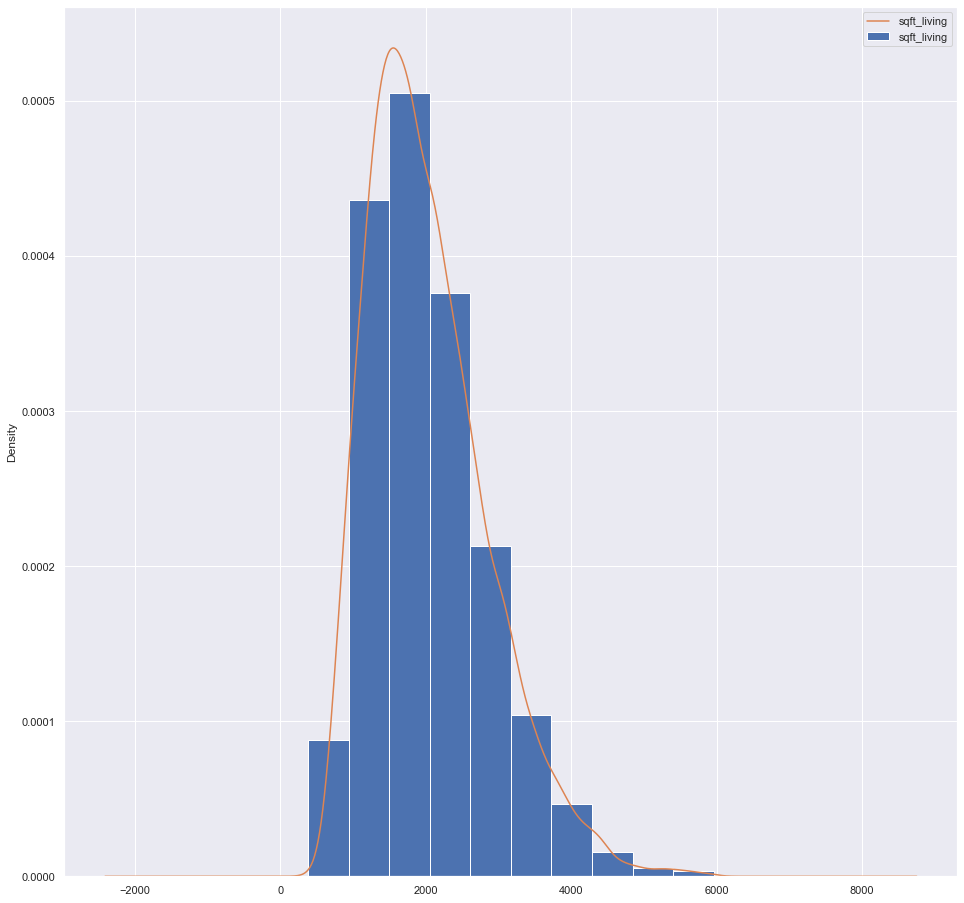

In [179]:
model_data_4.sqft_living.plot.hist(density=True)
model_data_4.sqft_living.plot.kde()
plt.legend()
plt.show()

sqft_living data is skewed left. 

##### Check on linearity assumption

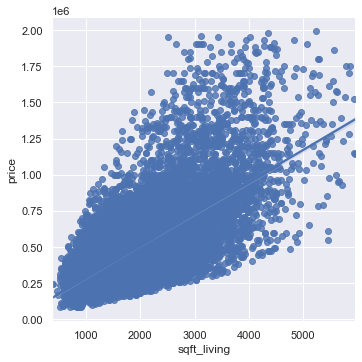

In [180]:
sns.lmplot(x='sqft_living', y='price', data=X_y_train);

'sqft_liivng' and price do meet linearity assumption. 

##### Checking on normality of residuals

<AxesSubplot:ylabel='Count'>

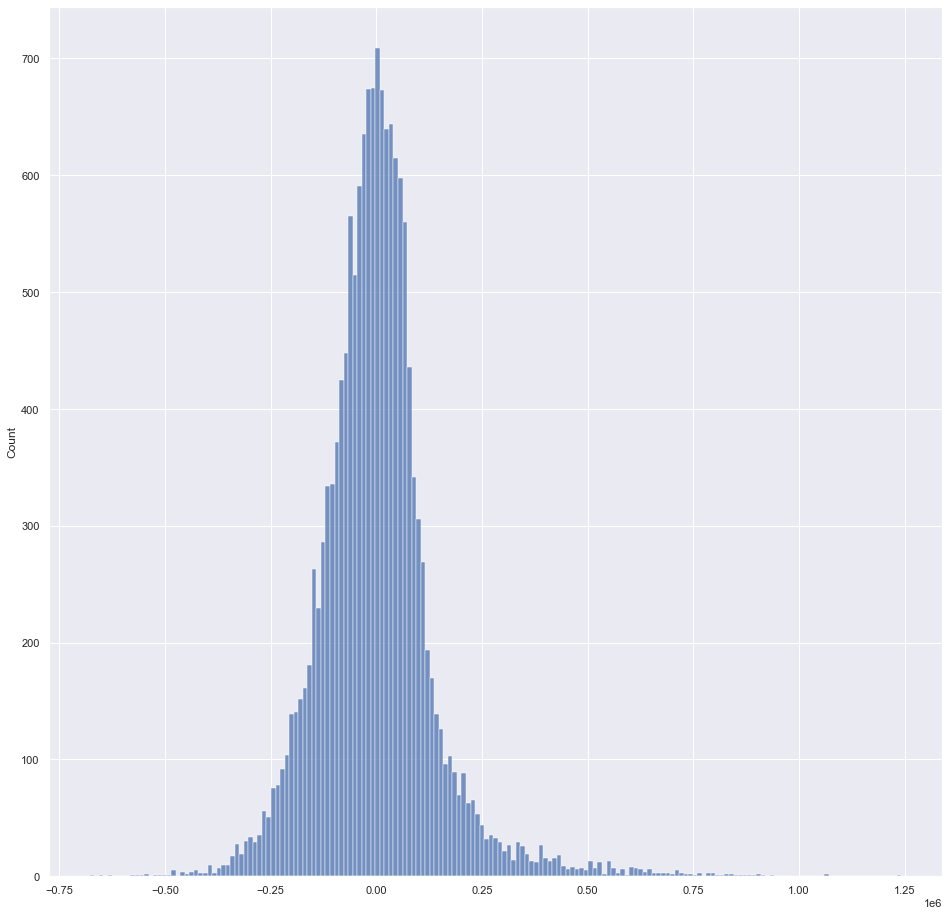

In [181]:
sns.histplot(model_4.resid)

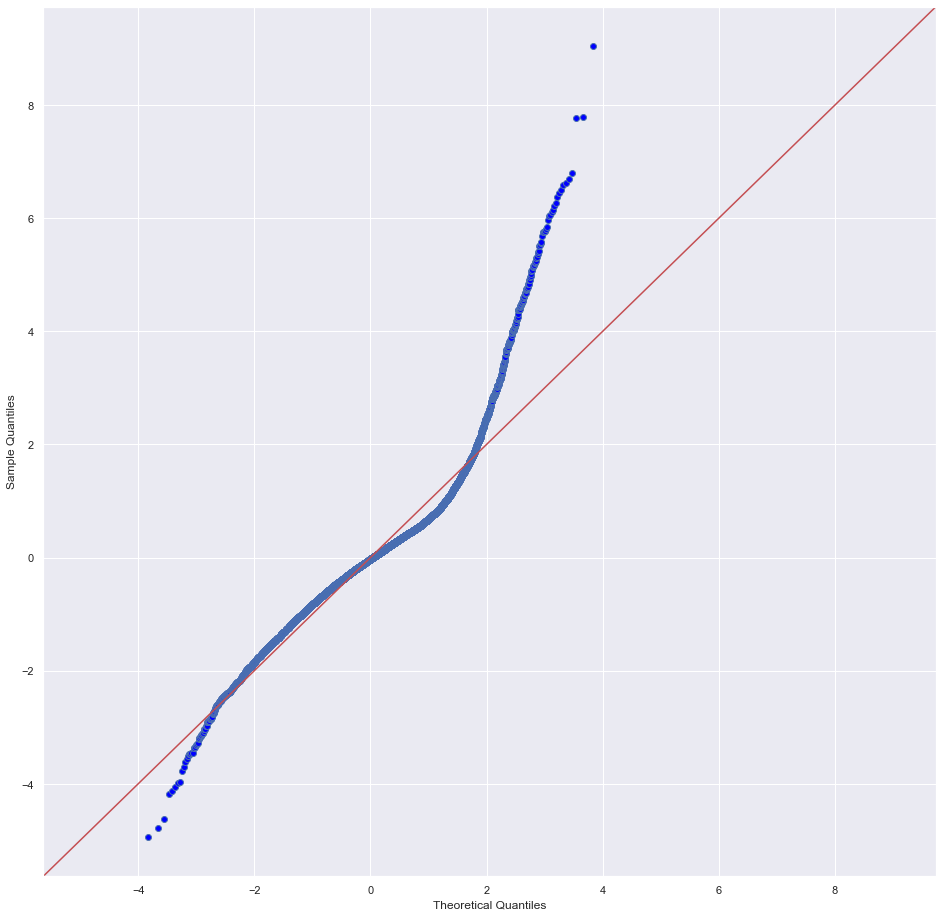

In [182]:
#checking in normality assumption for residuals

import scipy.stats as stats
residuals = model_4.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Residuals are not normally distributed. It looks like the residuals histogram has a high skinny top. 

##### Homoskedasticity

Durbin-Watson score (the test for error homoskedasticity) is within the normal range (2.022). 

In [183]:
#plt.scatter(x=fitted.fittedvalues,y=fitted.resid)

### Model_4_log (with log transformation)

In [184]:
# Model_4 with 'yr_sold' and 'mo_sold' as categoricals and 'sqft_living' log transformed

In [185]:
features_4 = ['sqft_living',  'waterfront_YES', 'yr_sold_2015',
              'condition_Fair', 'condition_Good', 'condition_Very Good', 
              'grade_9 Better', 'grade_11 Excellent',
              'grade_7 Average', 'grade_6 Low Average', 'grade_8 Good', 'grade_5 Fair',  
              'mo_sold_3', 'mo_sold_4', 'mo_sold_5', 'mo_sold_6', 'mo_sold_7', 'mo_sold_8',
              'mo_sold_9', 'mo_sold_10', 'mo_sold_11', 'mo_sold_12',
              'city_Bellevue', 'city_Bothell', 'city_Duvall',
              'city_Enumclaw', 'city_Issaquah', 'city_Kent',
              'city_Kirkland', 'city_Maple Valley', 'city_Mercer Island',
              'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Seattle',
              'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila', 'city_Woodinville',
              'city_Yarrow Point']

In [186]:
model_data_4_log = X_train_prep_2_log.loc[:, features_4]

In [187]:
predictors_4_log = sm.add_constant(model_data_4_log)
model_4_log = sm.OLS(y_train_log, predictors_4_log).fit()
model_4_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1335.
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:57:10   Log-Likelihood:                 621.90
No. Observations:               15513   AIC:                            -1162.
Df Residuals:                   15472   BIC:                            -848.2
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.1595      0.058    157.416      0.000       9.045       9.274
sqft_living             0.4807      0.007     70.168      0.000       0.467       0.494
waterfront_YES          0.5917      0.031     18.926      0.000       0.530       0.653
yr_sold_2015            0.0956      0.013      7.517      0.000       0.071       0.121
condition_Fair         -0.1450      0.021     -6.852      0.000      -0.187      -0.104
condition_Good          0.0650      0.005     14.343      0.000       0.056       0.074
condition_Very Good     0.1576      0.007     21.940      0.000       0.143       0.172
grade_9 Better         -0.1223      0.010    -12.061      0.000      -0.142      -0.102
grade_11 Excellent      0.1375      0.018      7.495      0.000       0.102       0.173
grade_7 Average        -0.4476      0.011    -42.493      0.000      -0.468      -0.427
grade_6 Low Average    -0.5894      0.013    -44.846      0.000      -0.615      -0.564
grade_8 Good           -0.3042      0.010    -30.978      0.000      -0.323      -0.285
grade_5 Fair           -0.6090      0.022    -27.609      0.000      -0.652      -0.566
mo_sold_3               0.0374      0.009      4.332      0.000       0.020       0.054
mo_sold_4               0.0652      0.008      7.877      0.000       0.049       0.081
mo_sold_5               0.0762      0.012      6.158      0.000       0.052       0.101
mo_sold_6               0.0955      0.015      6.294      0.000       0.066       0.125
mo_sold_7               0.0811      0.015      5.347      0.000       0.051       0.111
mo_sold_8               0.0753      0.015      4.904      0.000       0.045       0.105
mo_sold_9               0.0830      0.015      5.379      0.000       0.053       0.113
mo_sold_10              0.0902      0.015      5.853      0.000       0.060       0.120
mo_sold_11              0.0796      0.016      5.030      0.000       0.049       0.111
mo_sold_12              0.0794      0.016      5.033      0.000       0.048       0.110
city_Bellevue           0.6495      0.011     60.308      0.000       0.628       0.671
city_Bothell            0.4341      0.014     31.223      0.000       0.407       0.461
city_Duvall             0.3634      0.021     17.476      0.000       0.323       0.404
city_Enumclaw           0.0993      0.019      5.194      0.000       0.062       0.137
city_Issaquah           0.5394      0.011     50.207      0.000       0.518       0.560
city_Kent               0.0505      0.010      4.963      0.000       0.031       0.071
city_Kirkland           0.6410      0.011     59.186      0.000       0.620       0.662
city_Maple Valley       0.1718      0.013     13.304      0.000       0.146       0.197
city_Mercer Island      0.8689      0.019     46.149      0.000       0.832       0.906
cit

##### Checking on multicollinearity with VIF

In [188]:
# the independent variables set
X = model_data_4_log
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values('VIF', ascending = False, ignore_index=False)

,feature,VIF
0,sqft_living,69.998313
2,yr_sold_2015,14.230880
8,grade_7 Average,9.142018
16,mo_sold_7,6.555261
15,mo_sold_6,6.480244
10,grade_8 Good,6.451769
17,mo_sold_8,5.748553
19,mo_sold_10,5.550296
18,mo_sold_9,5.423907
34,city_Seattle,4.972506


##### Checking on normality of feature data

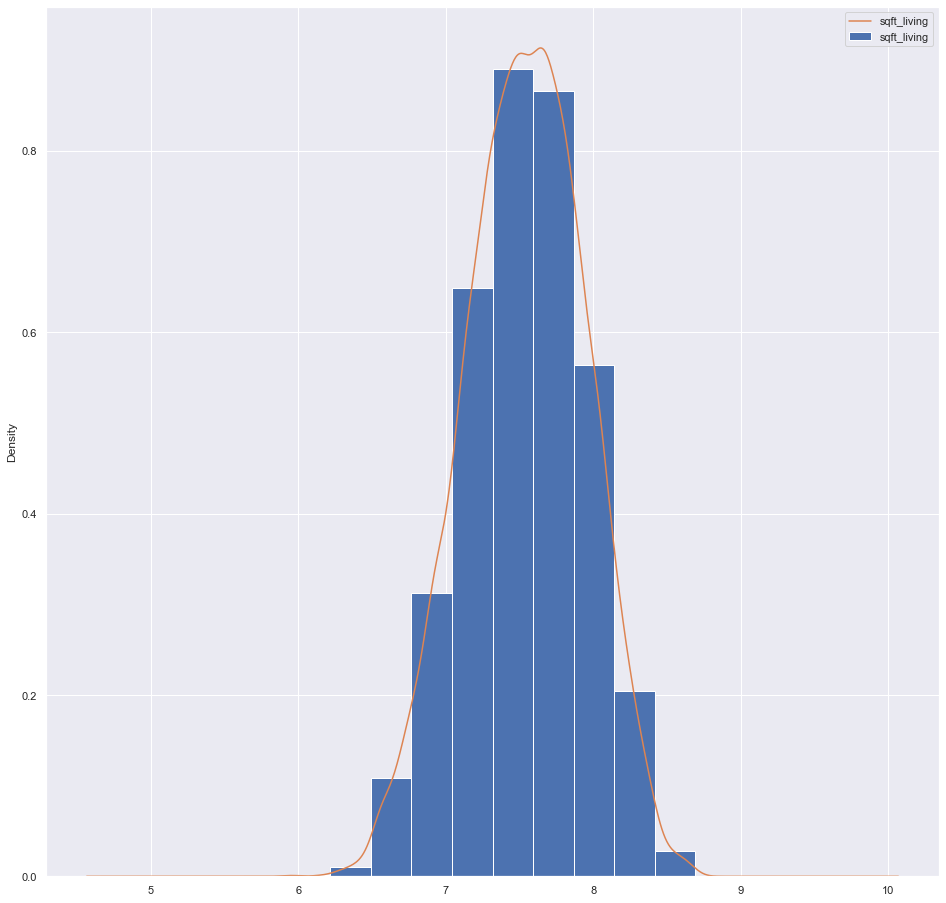

In [189]:
model_data_4_log.sqft_living.plot.hist(density=True)
model_data_4_log.sqft_living.plot.kde()
plt.legend()
plt.show()

sqft_living data is skewed left. 

##### Check on linearity assumption

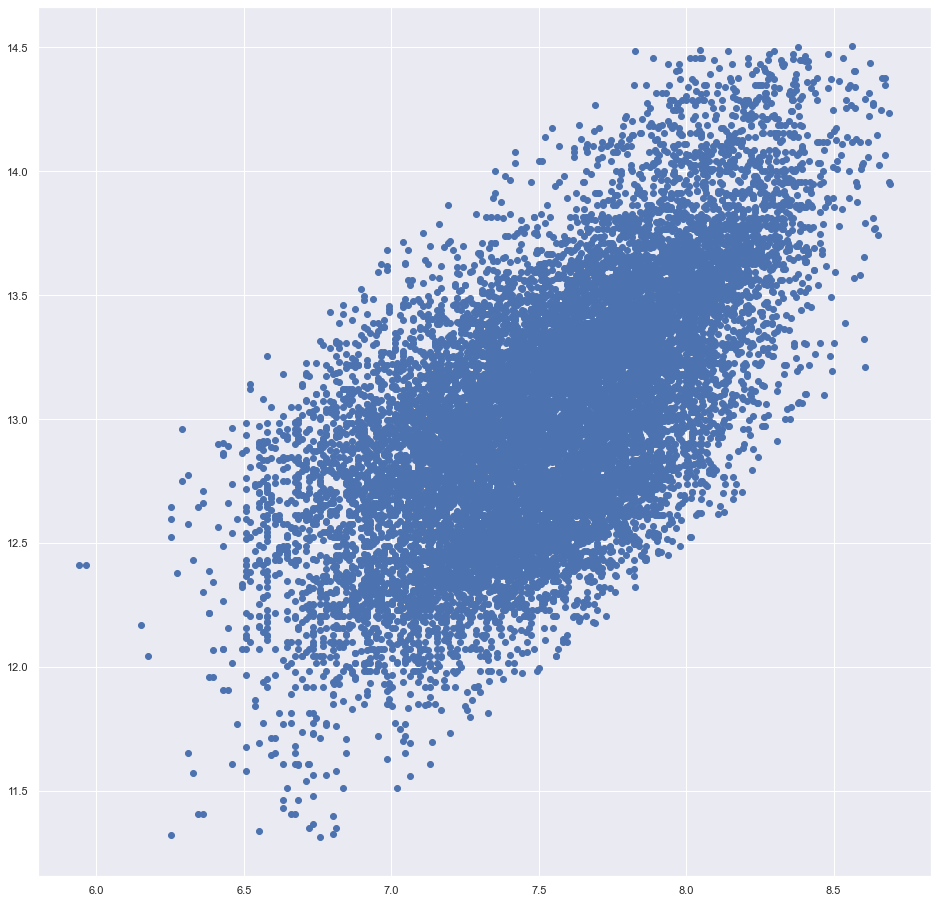

In [190]:
plt.scatter(x = X_train_prep_2_log.sqft_living, y = y_train_log)
plt.show()

'sqft_liivng' and price do meet linearity assumption. 

##### Checking on normality of residuals

<AxesSubplot:ylabel='Count'>

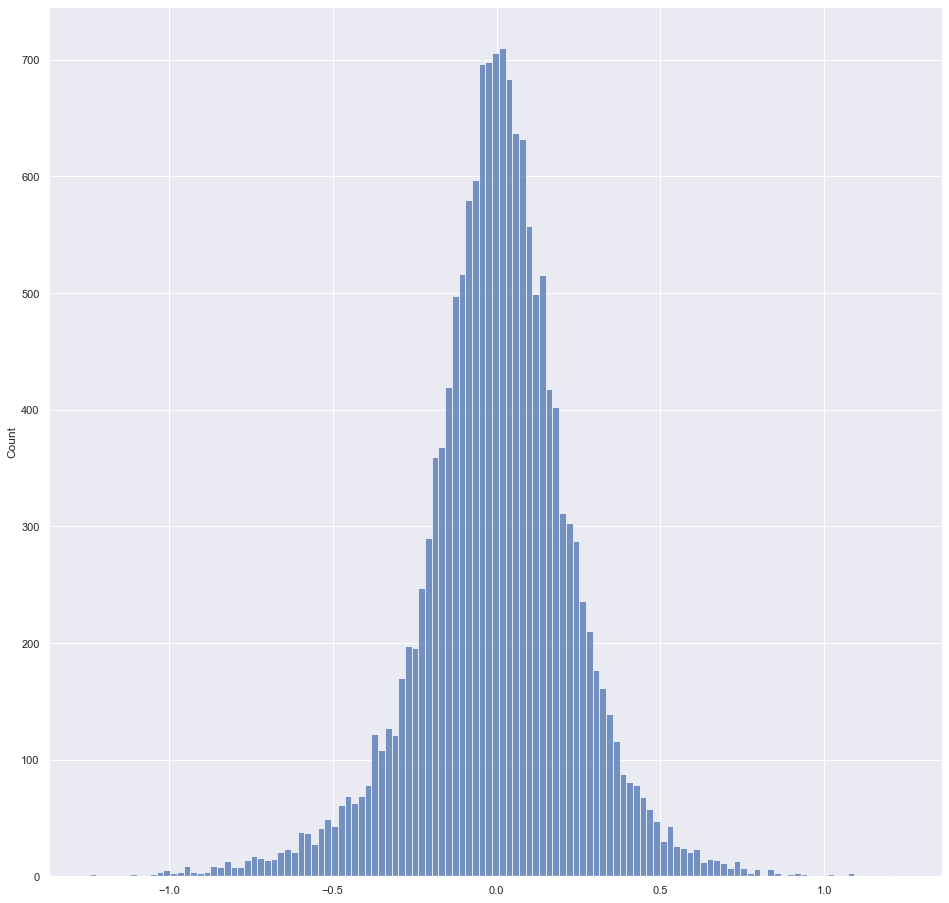

In [191]:
sns.histplot(model_4_log.resid)

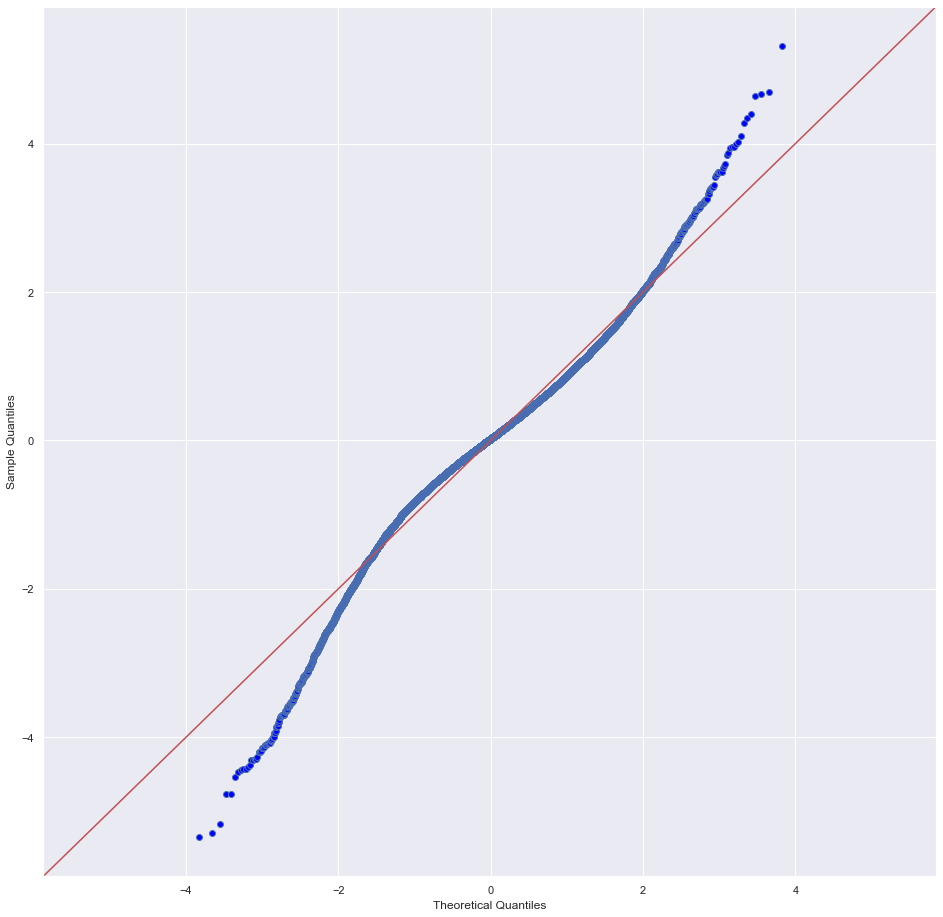

In [192]:
#checking in normality assumption for residuals

import scipy.stats as stats
residuals = model_4_log.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Residuals are not normally distributed. It looks like the residuals histogram has a high skinny top. 

##### Homoskedasticity

Durbin-Watson score (the test for error homoskedasticity) is within the normal range (2.019). 

In [193]:
#plt.scatter(x=fitted.fittedvalues,y=fitted.resid)

## 5. Evaluation

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(predictors_4, y_train)
y_hat_train = linreg.predict(predictors_4)
# normalized
mean_squared_error(y_train, y_hat_train)


18869013486.559757

In [197]:
# In units
mean_absolute_error(y_train, y_hat_train)

94924.26121228116

In [199]:
np.sqrt(mean_absolute_error(y_train, y_hat_train))

308.0978111124471

In [ ]:
#y_hat_test = linreg.predict(X_test)
#mean_squared_error(y_test, y_hat_test)

In [196]:
# Run this cell without changes
#model_4.fit(predictors_4, y_train)

AttributeError: 'OLSResults' object has no attribute 'fit'

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model_4, predictors_4, y_train, cv=3)

## 6. Deployment